In [1]:
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

#preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler

#unsupervised clustering
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import scipy.cluster.hierarchy as sch 

In [2]:
emp_df=pd.read_excel('project.xlsx')
emp_df

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
..   ..                 ...               ...              ...      ...   
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
0                       289                               36            13   
1                       118                               13            18   
2                       179                               51            18   
3                       279                                5            14   
4                       289                               36            13   
..                      ...                              ...           ...   
735                     289                               36            13   
736                     235                               11            14   
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work load Average/day  ...  Disciplinary failure  Education  Son  \
0     33                239.554  ...                     0          1    2   
1     50                239.554  ...                     1          1    1   
2     38                239.554  ...                     0          1    0   
3     39                239.554  ...                     0          1    2   
4     33                239.554  ...                     0          1    2   
..   ...                    ...  ...                   ...        ...  ...   
735   33                264.604  ...                     0          1    2   
736   37                264.604  ...                     0          3    1   
737   40                271.219  ...                     0          1    1   
738   39                271.219  ...                     0          1    2   
739   53                271.219  ...                     0          1    1   

     Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0                 1              0    1      90     172               30   
1                 1              0    0      98     178               31   
2                 1              0    0      89     170               31   
3                 1              1    0      68     168               24   
4                 1              0    1      90     172               30   
..              ...            ...  ...     ...     ...              ...   
735               1              0    1      90     172               30   
736               0              0    1      88     172               29   
737               1              0    8      98     170               34   
738               1              0    2     100     170               35   
739               0              0    1      77     175               25   

     Absenteeism time in hours  
0                            4  
1                            0  
2                            2  
3                            4  
4                            2  
..                         ...  
735                          8  
736                          4  
737                 

In [3]:
emp_df.shape

(740, 21)

In [4]:
emp_df.head(2)

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   

   Work load Average/day  ...  Disciplinary failure  Education  Son  \
0                239.554  ...                     0          1    2   
1                239.554  ...                     1          1    1   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   

   Absenteeism time in hours  
0                          4  
1                          0  

[2 rows x 21 columns]

In [5]:
emp_df.tail(2)

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
738                     231                               35            14   
739                     179                               45            14   

     Age  Work load Average/day  ...  Disciplinary failure  Education  Son  \
738   39                271.219  ...                     0          1    2   
739   53                271.219  ...                     0          1    1   

     Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
738               1              0    2     100     170               35   
739               0              0    1      77     175               25   

     Absenteeism time in hours  
738                          0  
739                          0  

[2 rows x 21 columns]

In [6]:
emp_df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [7]:
emp_df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [8]:
categorical=[]
numerical=[]
for i  in emp_df.columns:
    n_uni=emp_df[i].nunique()
    if (n_uni>15):
        numerical.append(i)
    else:
        categorical.append(i)
        
print(categorical)
print(numerical)

['Month of absence', 'Day of the week', 'Seasons', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Height']
['ID', 'Reason for absence', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day', 'Weight', 'Body mass index', 'Absenteeism time in hours']


In [9]:
def categorytype(col):
    emp_df[col]=emp_df[col].astype('category')

In [10]:
categorytype(categorical)

In [11]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason for absence               740 non-null    int64   
 2   Month of absence                 740 non-null    category
 3   Day of the week                  740 non-null    category
 4   Seasons                          740 non-null    category
 5   Transportation expense           740 non-null    int64   
 6   Distance from Residence to Work  740 non-null    int64   
 7   Service time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work load Average/day            740 non-null    float64 
 10  Hit target                       740 non-null    category
 11  Disciplinary failure             740 non-null    category
 12  Educatio

In [12]:
emp_df.describe().T

count        mean        std      min  \
ID                               740.0   18.017568  11.021247    1.000   
Reason for absence               740.0   19.216216   8.433406    0.000   
Transportation expense           740.0  221.329730  66.952223  118.000   
Distance from Residence to Work  740.0   29.631081  14.836788    5.000   
Service time                     740.0   12.554054   4.384873    1.000   
Age                              740.0   36.450000   6.478772   27.000   
Work load Average/day            740.0  271.490235  39.058116  205.917   
Weight                           740.0   79.035135  12.883211   56.000   
Body mass index                  740.0   26.677027   4.285452   19.000   
Absenteeism time in hours        740.0    6.924324  13.330998    0.000   

                                     25%      50%      75%      max  
ID                                 9.000   18.000   28.000   36.000  
Reason for absence                13.000   23.000   26.000   28.000  
Transportation expense           179.000  225.000  260.000  388.000  
Distance from Residence to Work   16.000   26.000   50.000   52.000  
Service time                       9.000   13.000   16.000   29.000  
Age                               31.000   37.000   40.000   58.000  
Work load Average/day            244.387  264.249  294.217  378.884  
Weight                            69.000   83.000   89.000  108.000  
Body mass index                   24.000   25.000   31.000   38.000  
Absenteeism time in hours          2.000    3.000    8.000  120.000

In [13]:
emp_df_copy=emp_df.copy()

In [14]:
emp_df_copy.drop('ID',axis=1,inplace=True)
emp_df_copy.head(2)

Reason for absence Month of absence Day of the week Seasons  \
0                  26                7               3       1   
1                   0                7               3       1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   

   Work load Average/day Hit target Disciplinary failure Education Son  \
0                239.554         97                    0         1   2   
1                239.554         97                    1         1   1   

  Social drinker Social smoker Pet  Weight Height  Body mass index  \
0              1             0   1      90    172               30   
1              1             0   0      98    178               31   

   Absenteeism time in hours  
0                          4  
1                          0

In [15]:
for i in categorical:
    value_c=emp_df_copy[i].value_counts()
    print(value_c)

3     87
2     72
10    71
7     67
5     64
11    63
6     54
8     54
4     53
9     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64
2    161
4    156
3    154
6    144
5    125
Name: Day of the week, dtype: int64
4    195
2    192
3    183
1    170
Name: Seasons, dtype: int64
93     105
99     102
97      89
92      79
95      75
96      75
98      66
91      45
94      34
88      28
81      19
87      12
100     11
Name: Hit target, dtype: int64
0    700
1     40
Name: Disciplinary failure, dtype: int64
1    611
3     79
2     46
4      4
Name: Education, dtype: int64
0    298
1    229
2    156
4     42
3     15
Name: Son, dtype: int64
1    420
0    320
Name: Social drinker, dtype: int64
0    686
1     54
Name: Social smoker, dtype: int64
0    460
1    138
2     96
4     32
8      8
5      6
Name: Pet, dtype: int64
170    166
172    155
169     95
171     83
178     57
168     48
167     34
196     29
165     24
182     20
174      8
175      8
185      7
163    

In [16]:
for i in numerical:
    value_c=emp_df[i].value_counts()
    print(value_c)

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
9       8
6       8
23      8
27      7
12      7
30      7
2       6
7       6
26      5
32      5
29      5
19      3
21      3
31      3
8       2
16      2
4       1
35      1
Name: ID, dtype: int64
23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64
179    180
118     92
225     81
235     58
289     45
260     42
291     40
246     30
155     29
361     24
248     24
330     16
369     15
228      8
189      8
378      8
157      7
184      7
233      7
279      6
300      5
388      3
268      3
231      2
Name: Transportation expense, dtyp

In [17]:
emp_df_copy.isnull().sum()

Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# EDA 

In [18]:
def categoryplot(col):
    for i in col:
        plt.figure(i)
        sns.countplot(emp_df_copy[i],palette='icefire')
        plt.title(f'Countplot chart of {i}')
        plt.show()

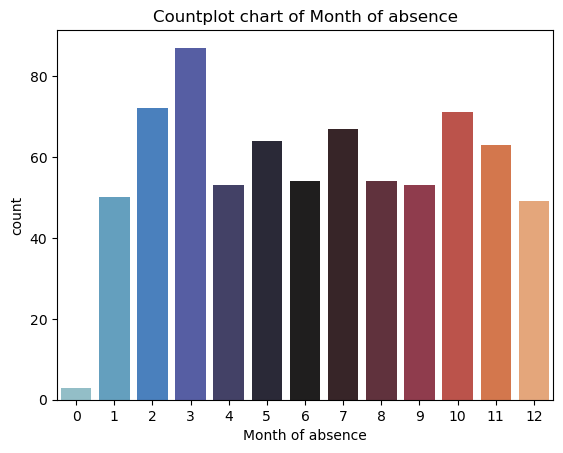

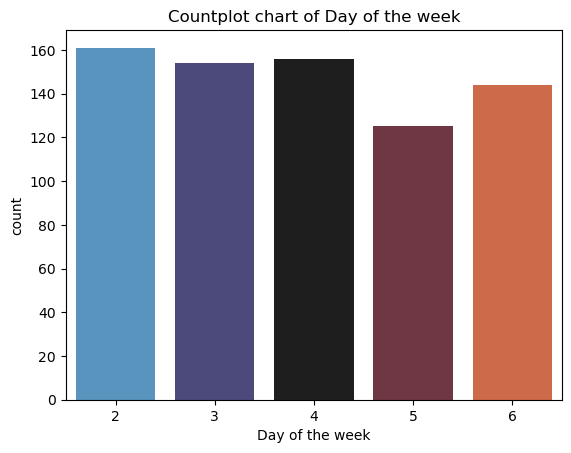

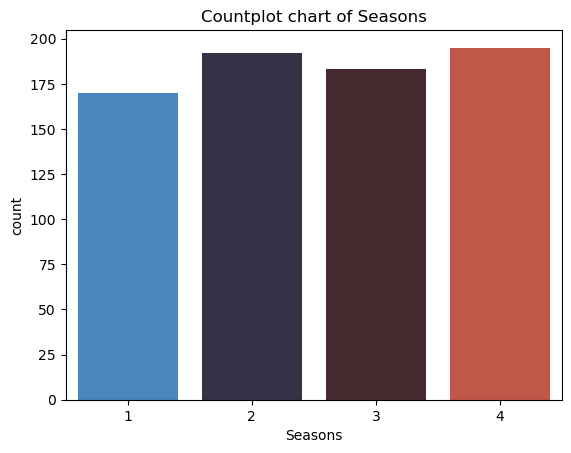

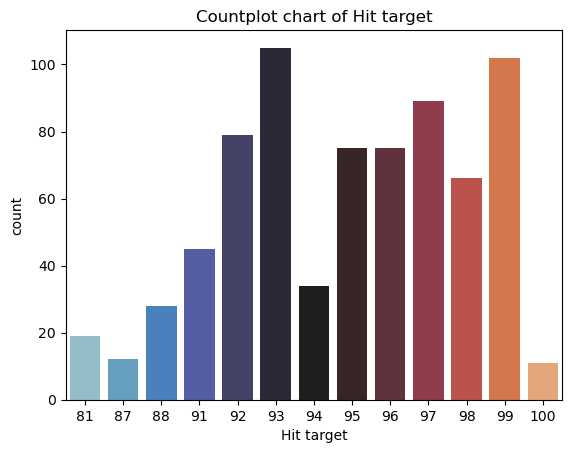

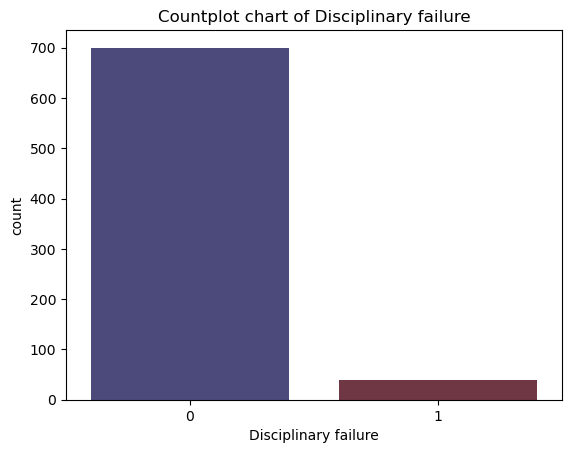

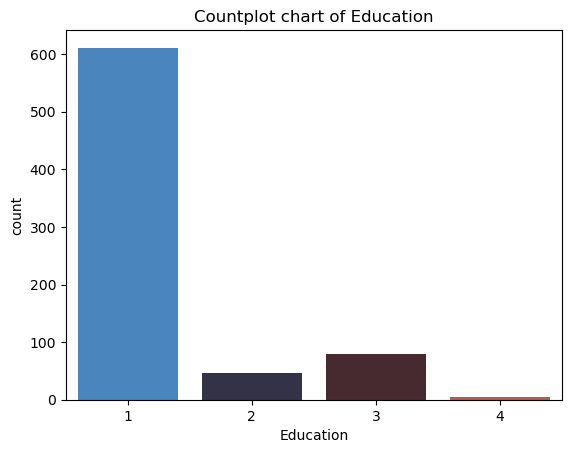

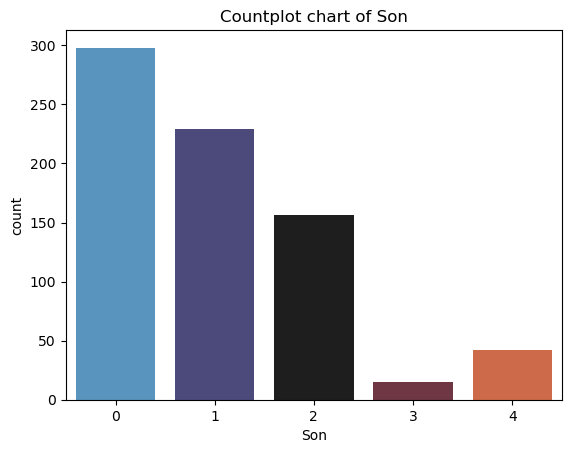

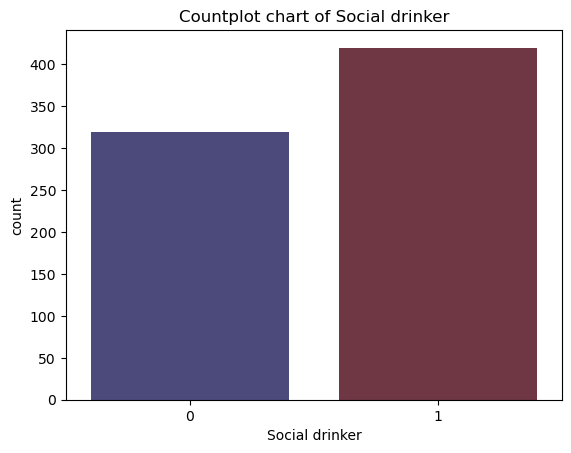

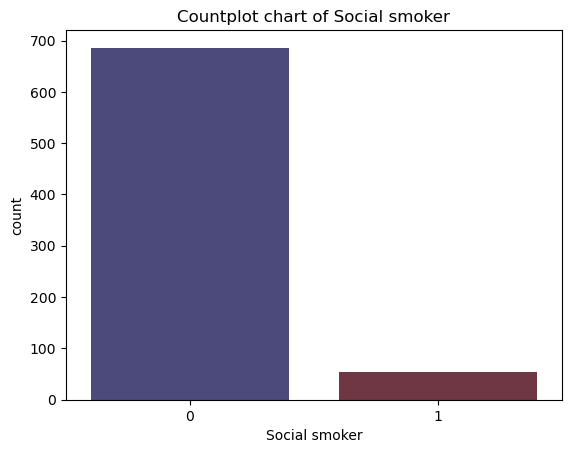

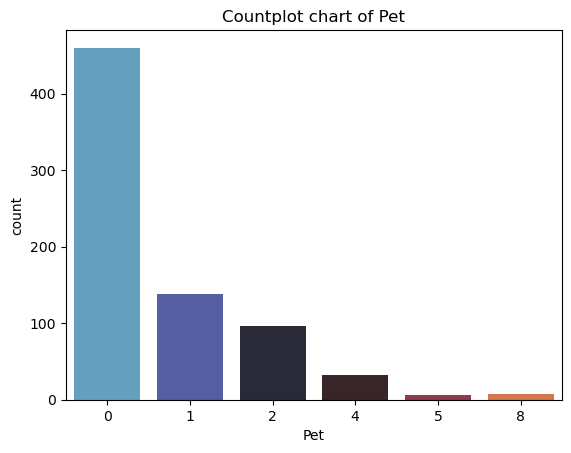

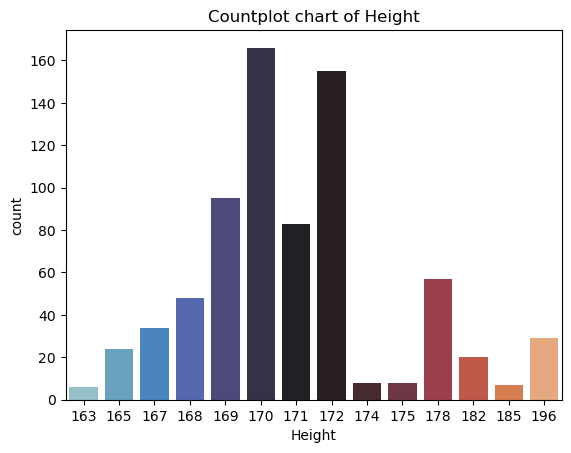

In [19]:
categoryplot(categorical)

# Interpretation
- Majority of Employees took leave on 3rd month 
- Majority of Employees took leave on 2nd,3rd and 4th day of week
- Majority of Employees took leave on 2nd and 4th Season
- Majority of Employees have Hit target of 93 
- Majority of Employees have 0 Disciplinary failure
- Majority of Employees have Education as 1
- Majority of Employees have 0 sons 
- Majority of Employees are Social drinker 
- Majority of Employees are Non Social smoker 
- Majority of Employees have 0 Pets 

In [20]:
numerical.remove('ID')

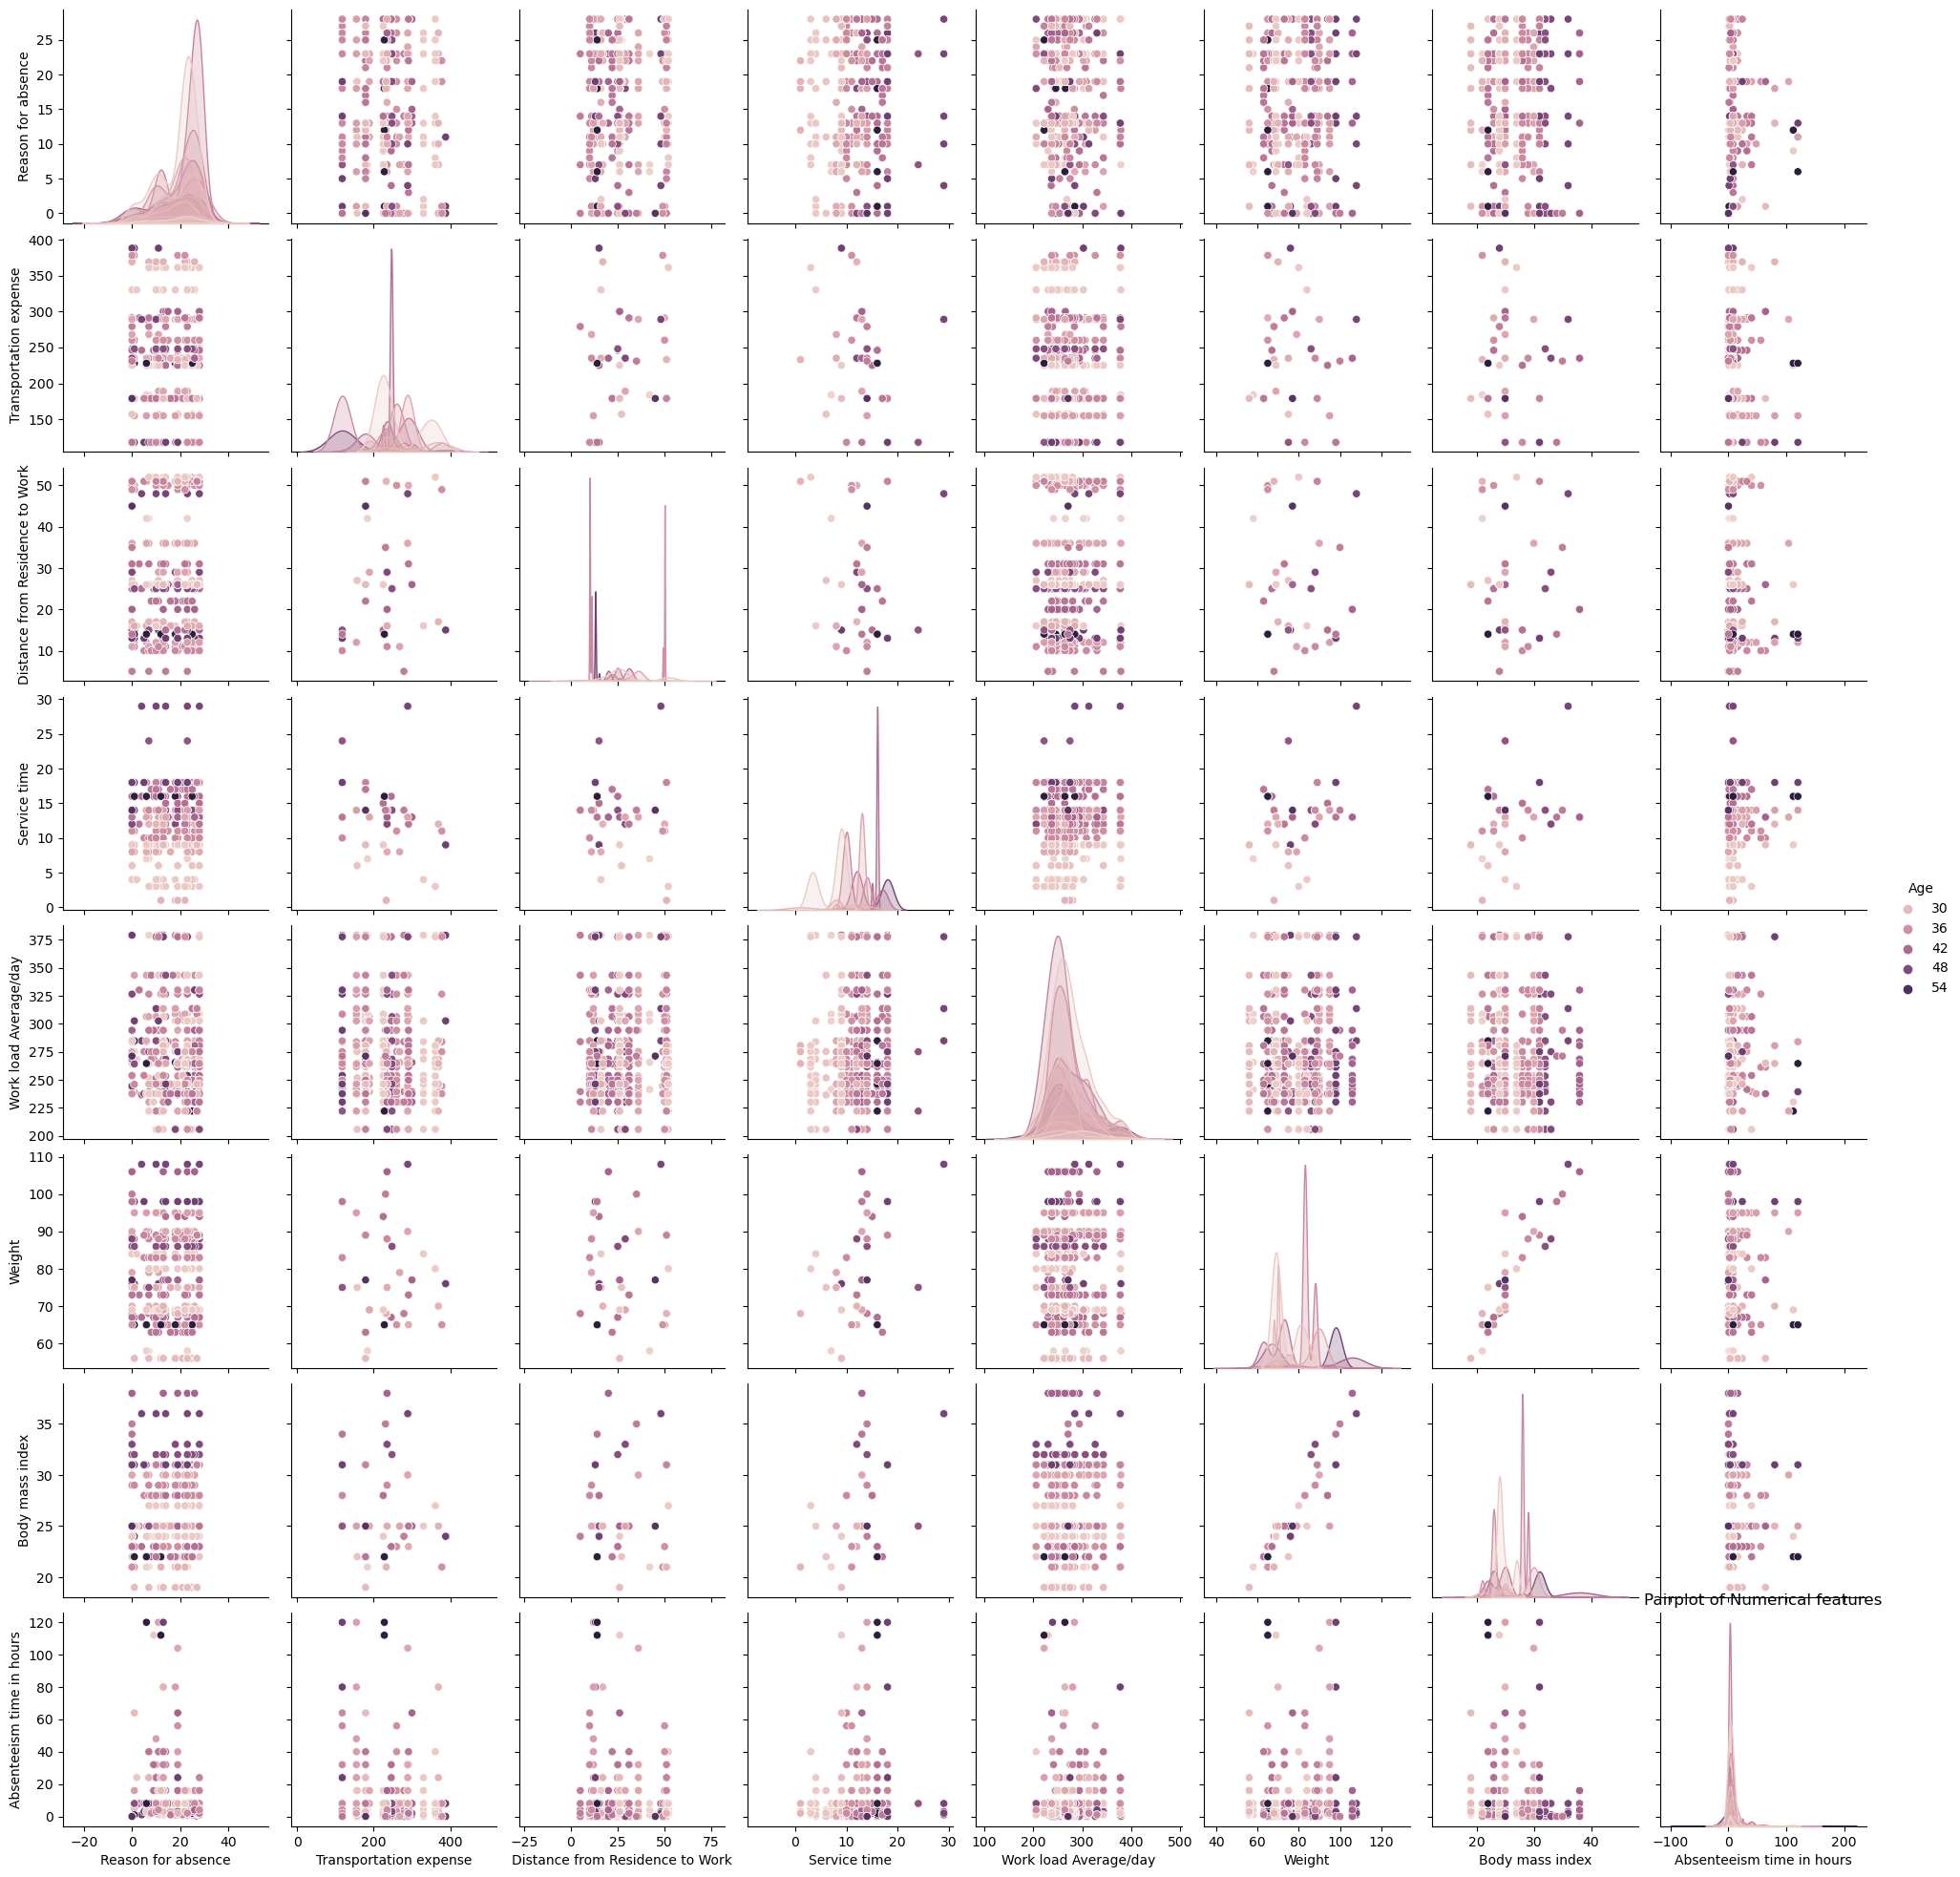

In [21]:
sns.pairplot(emp_df_copy[numerical],hue='Age')
plt.title('Pairplot of Numerical features')
plt.show()

In [22]:
#feature scaling 
sd=StandardScaler()
emp_df_copy[numerical]=sd.fit_transform(emp_df_copy[numerical])

In [23]:
emp_df_copy[categorical]=sd.fit_transform(emp_df_copy[categorical])

In [24]:
emp_df_copy.head()

Reason for absence  Month of absence  Day of the week   Seasons  \
0            0.804938          0.196763        -0.643947 -1.390175   
1           -2.280124          0.196763        -0.643947 -1.390175   
2            0.448970          0.196763         0.059924 -1.390175   
3           -1.449530          0.196763         0.763796 -1.390175   
4            0.448970          0.196763         0.763796 -1.390175   

   Transportation expense  Distance from Residence to Work  Service time  \
0                1.011408                         0.429556      0.101770   
1               -1.544379                        -1.121694      1.242825   
2               -0.632665                         1.441240      1.242825   
3                0.861947                        -1.661258      0.329981   
4                1.011408                         0.429556      0.101770   

        Age  Work load Average/day  Hit target  Disciplinary failure  \
0 -0.532868              -0.818212    0.638686             -0.239046   
1  2.092860              -0.818212    0.638686              4.183300   
2  0.239405              -0.818212    0.638686             -0.239046   
3  0.393859              -0.818212    0.638686             -0.239046   
4 -0.532868              -0.818212    0.638686             -0.239046   

   Education       Son  Social drinker  Social smoker      Pet    Weight  \
0  -0.433857  0.893723        0.872872      -0.280566  0.19285  0.851673   
1  -0.433857 -0.017234        0.872872      -0.280566 -0.56624  1.473056   
2  -0.433857 -0.928191        0.872872      -0.280566 -0.56624  0.774000   
3  -0.433857  0.893723        0.872872       3.564226 -0.56624 -0.857131   
4  -0.433857  0.893723        0.872872      -0.280566  0.19285  0.851673   

     Height  Body mass index  Absenteeism time in hours  
0 -0.019046         0.775932                  -0.219511  
1  0.975828         1.009438                  -0.519767  
2 -0.350671         1.009438                  -0.369639  
3 -0.682295        -0.625100                  -0.219511  
4 -0.019046         0.775932                  -0.369639

In [25]:
#since we have to cluster absenteeism, we have to remove the target label (Disciplinary failure) from the data

emp_df_copy.drop('Disciplinary failure',axis=1,inplace=True)

# Feature extraction-- for feature reduction

In [26]:
from sklearn.decomposition import PCA
pca=PCA(n_components=12)
pca_x=pca.fit_transform(emp_df_copy)
var=pca.explained_variance_ratio_
print(var)

[0.17565279 0.11727185 0.09143669 0.08036757 0.07409727 0.0630217
 0.0578139  0.05170754 0.04931286 0.04376321 0.04162716 0.0384124 ]


In [27]:
pca_x=pd.DataFrame(pca_x)
pca_x.head(2)

0         1         2         3         4         5         6   \
0  0.816755  1.258357 -1.181488  0.473727 -1.219634  0.327099  1.115557   
1  3.196792 -1.684506  0.814939  1.042924 -0.219892  1.083513  0.757025   

         7         8         9         10        11  
0 -0.385687 -0.388726 -0.280745 -0.429692 -0.690925  
1 -0.444156 -0.423556  1.097940  0.446461 -1.105517

# type1 -- Kmeans clustering before reduction

SSE
[12268.46197598374, 11167.215809639232, 10449.948300519241, 9761.693947272013, 9043.68350748898, 8512.161516441009, 8121.010461782907, 7763.392479226641, 7317.084300549984]
----------------------------------------------------------------------------------------------------------------------
SILHOUETTE SCORE
[0.13092887288095784, 0.14382758254586436, 0.1531586063231775, 0.15213034602885434, 0.17089305616927372, 0.18392753254769592, 0.1923635412762981, 0.2076997749621917, 0.18087788145634645]


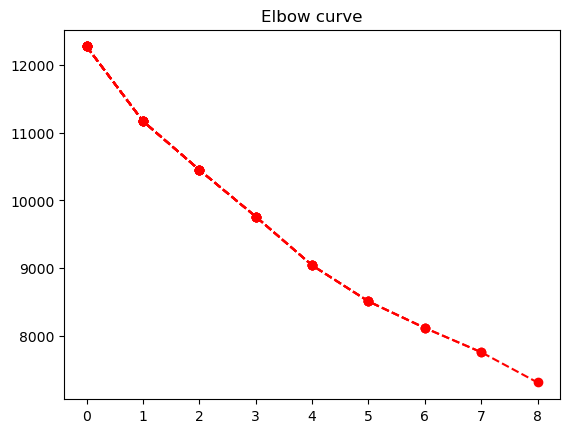

In [29]:
from sklearn.metrics import silhouette_score
wcss=[]
K_means_silhouette=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(emp_df_copy)
    wcss.append(km.inertia_)
    
     #plotting
    plt.plot(wcss,marker='o',c='r',linestyle='--')
    plt.title('Elbow curve')
    
        #printing silhouette score for n_clusters
    K_means_silhouette.append(silhouette_score(emp_df_copy,km.labels_))
    
print('SSE')   
print(wcss)
print('----------------------------------------------------------------------------------------------------------------------')
print('SILHOUETTE SCORE')
print(K_means_silhouette)

# Interpretation
From the Elbow curve and silhouette_score, we conclude to having 9 clusters for Kmeans clustering 

In [116]:
from ipywidgets import interact
import ipywidgets as w 


value=w.RadioButtons()
value


Button(style=ButtonStyle(), tooltip='Kmeans')

In [30]:

def best(cluster,i,df):
    model=cluster(n_clusters=i)
    model.fit(df)
    model_labels=model.labels_
    df[f'{model}']=model_labels
    return df.head(2)
    

In [31]:
best(KMeans,9,emp_df_copy)

Reason for absence  Month of absence  Day of the week   Seasons  \
0            0.804938          0.196763        -0.643947 -1.390175   
1           -2.280124          0.196763        -0.643947 -1.390175   

   Transportation expense  Distance from Residence to Work  Service time  \
0                1.011408                         0.429556      0.101770   
1               -1.544379                        -1.121694      1.242825   

        Age  Work load Average/day  Hit target  Education       Son  \
0 -0.532868              -0.818212    0.638686  -0.433857  0.893723   
1  2.092860              -0.818212    0.638686  -0.433857 -0.017234   

   Social drinker  Social smoker      Pet    Weight    Height  \
0        0.872872      -0.280566  0.19285  0.851673 -0.019046   
1        0.872872      -0.280566 -0.56624  1.473056  0.975828   

   Body mass index  Absenteeism time in hours  KMeans(n_clusters=9)  
0         0.775932                  -0.219511                     2  
1         1.009438                  -0.519767                     8

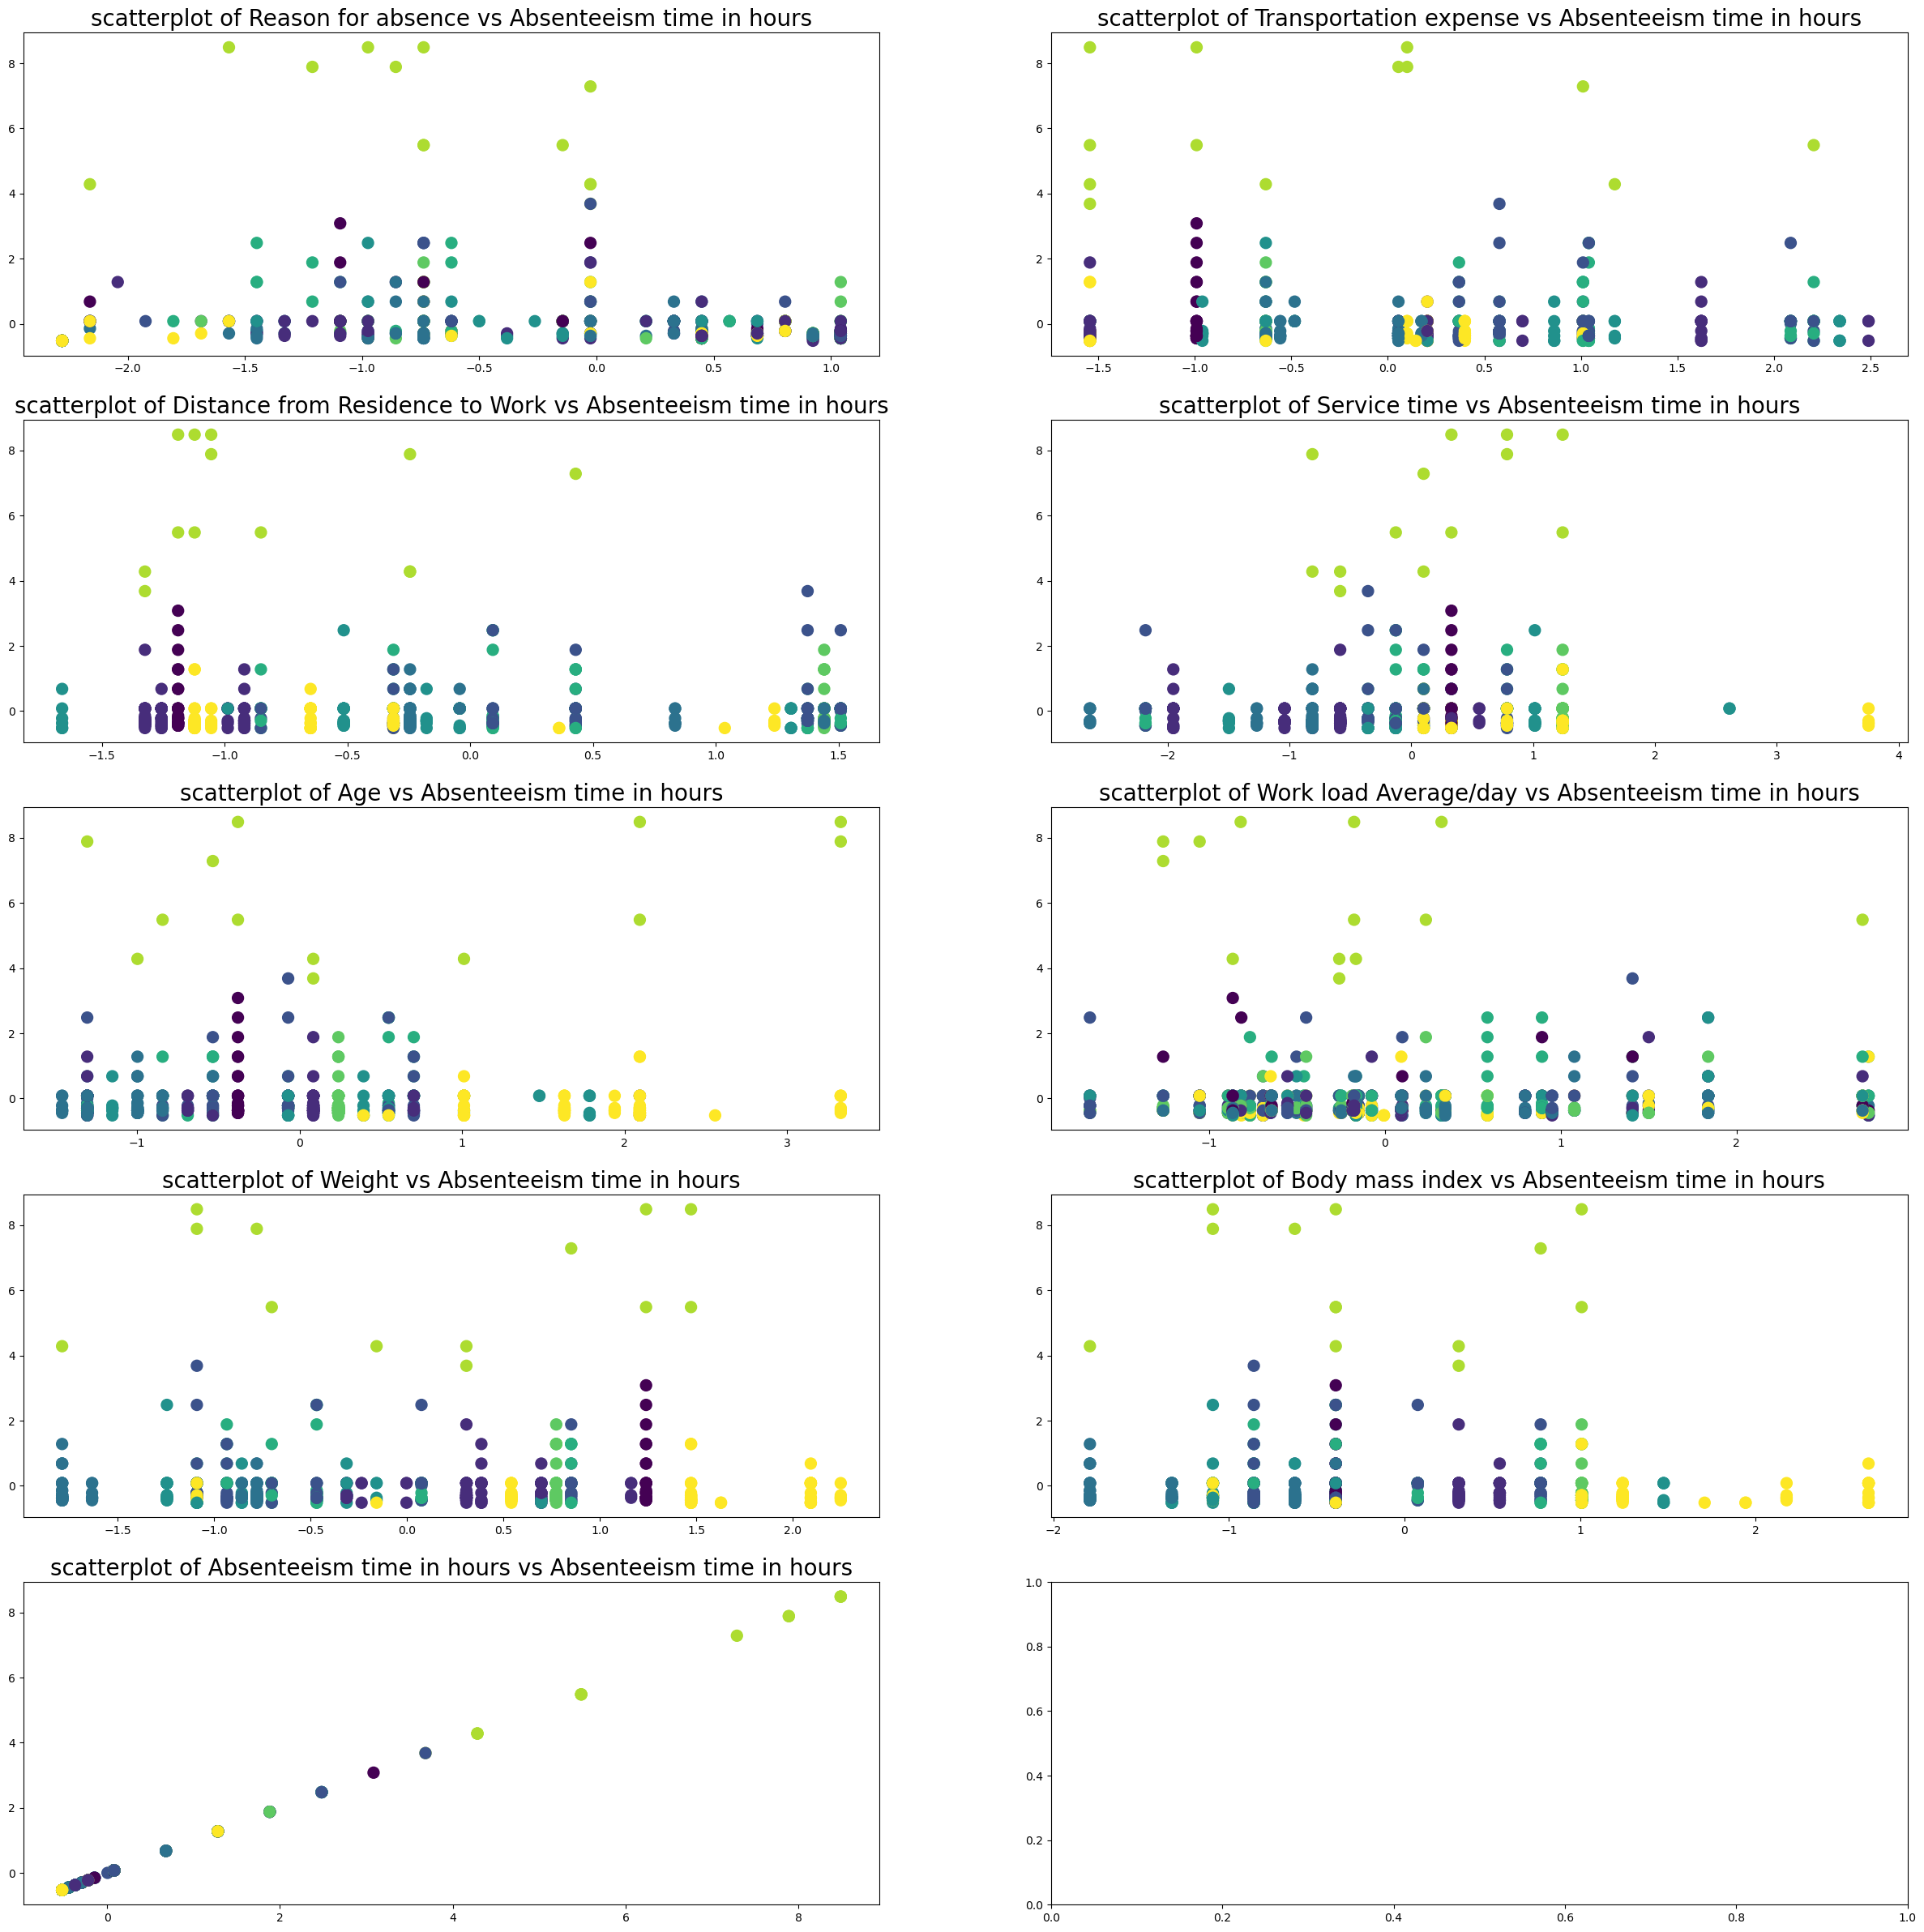

In [93]:
## for plotting clusters

fig,ax=plt.subplots(5,2,figsize=(30,30))

for i,j in list(zip(emp_df_copy[numerical].columns,ax.flatten())):
    j.scatter(emp_df_copy[i],emp_df_copy['Absenteeism time in hours'],c=emp_df_copy['KMeans(n_clusters=9)'],s=100)
    j.set_title(f'scatterplot of {i} vs Absenteeism time in hours',fontsize=20)
    

# Kmeans with feature reduction

SSE
[10648.92990762107, 9595.899289927187, 8859.044338350002, 8113.711531204096, 7570.025292429393, 7176.191888812128, 6786.119855926865, 6215.813215607181, 5995.722476890313]
----------------------------------------------------------------------------------------------------------------------
SILHOUETTE SCORE
[0.12220383831454348, 0.15057844595150605, 0.18490579637998922, 0.17080408451296358, 0.18005739628773415, 0.1806819064167462, 0.13410545977295685, 0.2170557257454977, 0.20986335305965478]


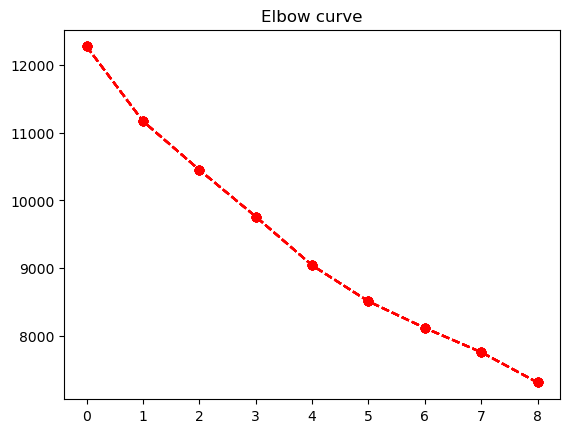

In [33]:
wcss_red=[]
K_means_silhouette_red=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(pca_x)
    wcss_red.append(km.inertia_)
    
     #plotting
    plt.plot(wcss,marker='o',c='r',linestyle='--')
    plt.title('Elbow curve')
    
        #printing silhouette score for n_clusters
    K_means_silhouette_red.append(silhouette_score(emp_df_copy,km.labels_))
    
print('SSE')   
print(wcss_red)
print('----------------------------------------------------------------------------------------------------------------------')
print('SILHOUETTE SCORE')
print(K_means_silhouette_red)

In [34]:
best(KMeans,9,pca_x)

0         1         2         3         4         5         6  \
0  0.816755  1.258357 -1.181488  0.473727 -1.219634  0.327099  1.115557   
1  3.196792 -1.684506  0.814939  1.042924 -0.219892  1.083513  0.757025   

          7         8         9        10        11  KMeans(n_clusters=9)  
0 -0.385687 -0.388726 -0.280745 -0.429692 -0.690925                     5  
1 -0.444156 -0.423556  1.097940  0.446461 -1.105517                     7

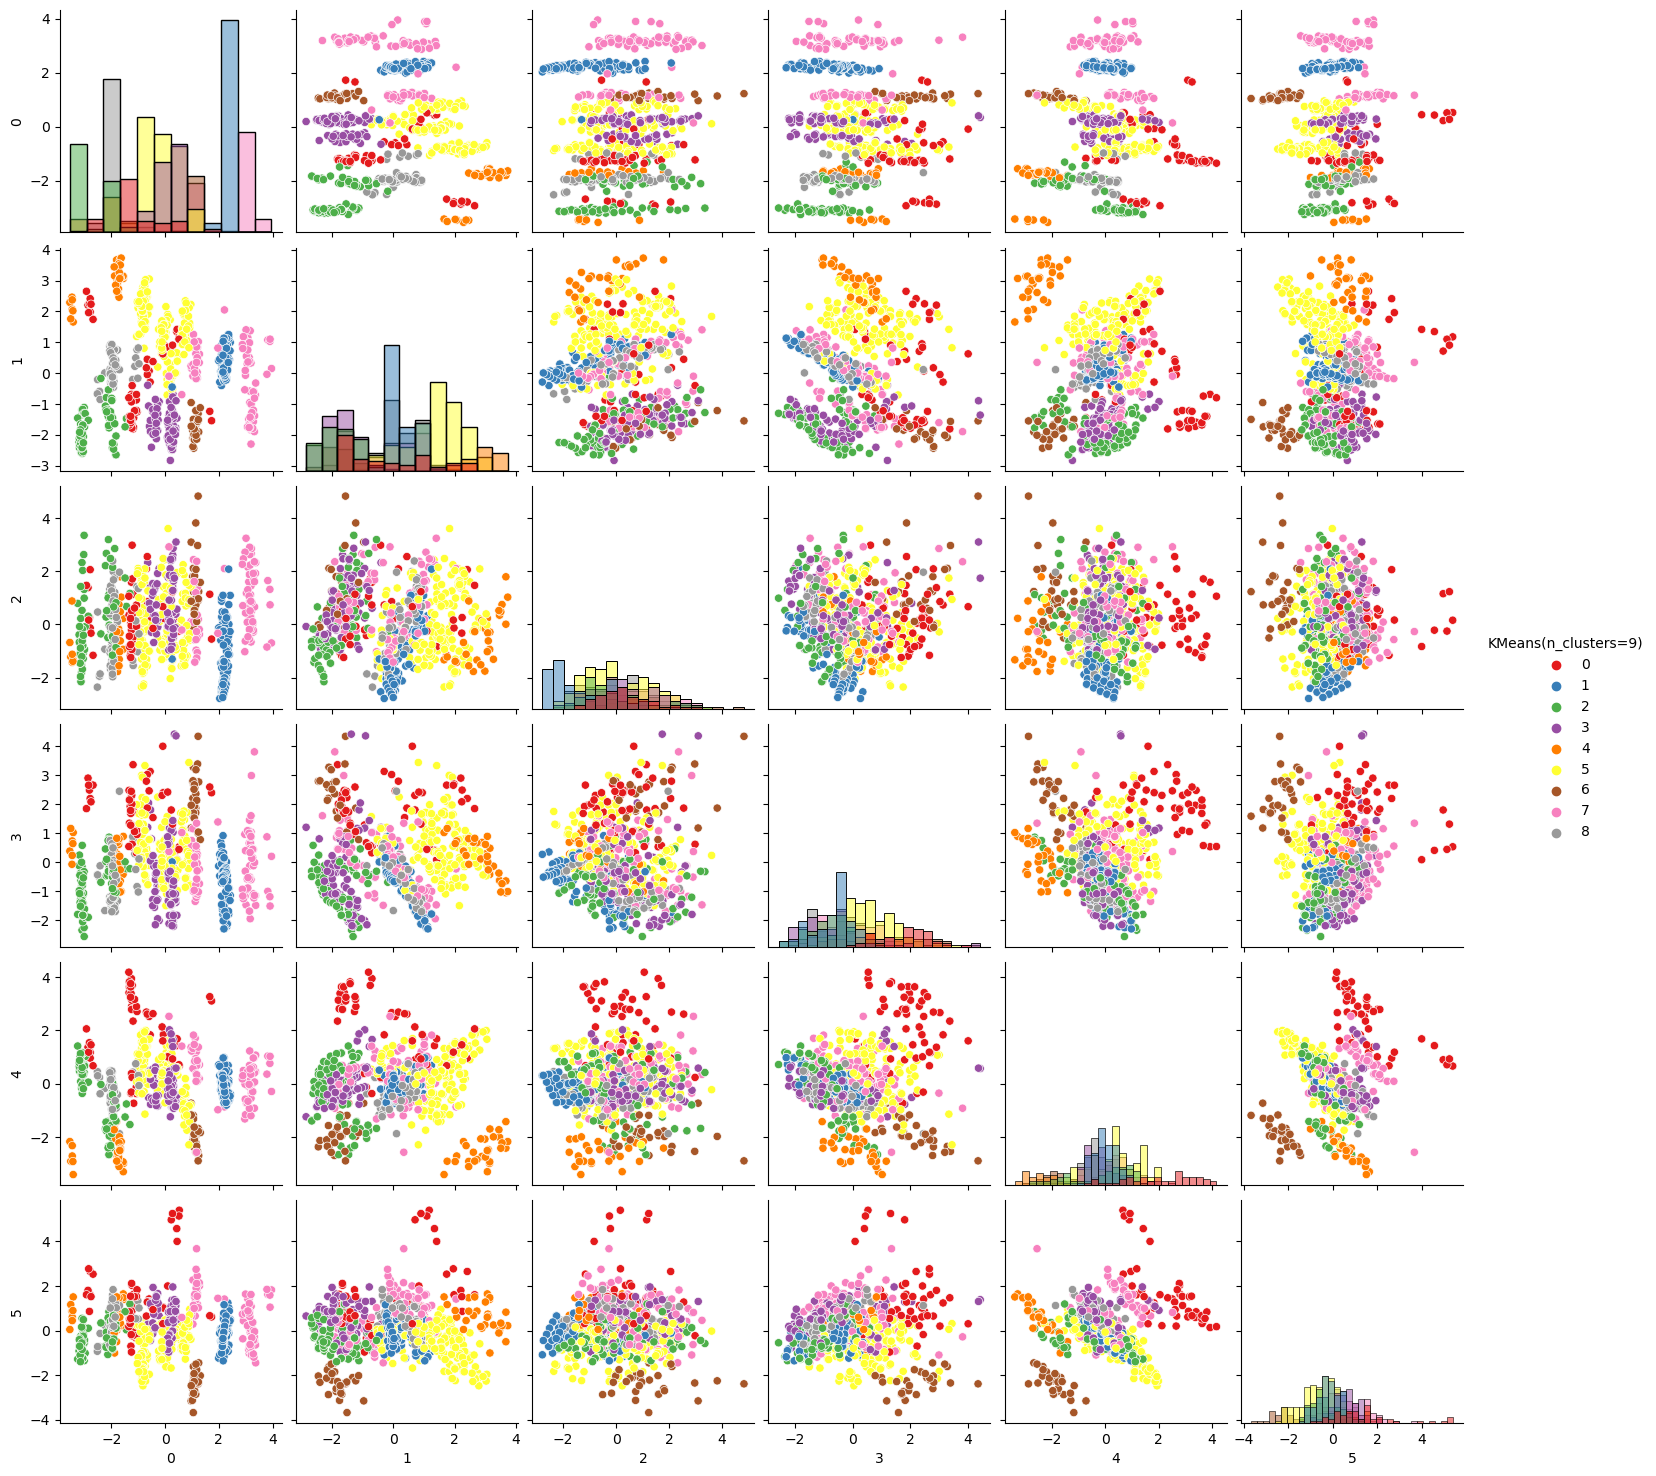

In [35]:
sns.pairplot(pca_x.iloc[:,[0,1,2,3,4,5,12]],hue='KMeans(n_clusters=9)',diag_kind='hist',palette='Set1')

# Agglomerative clustering 

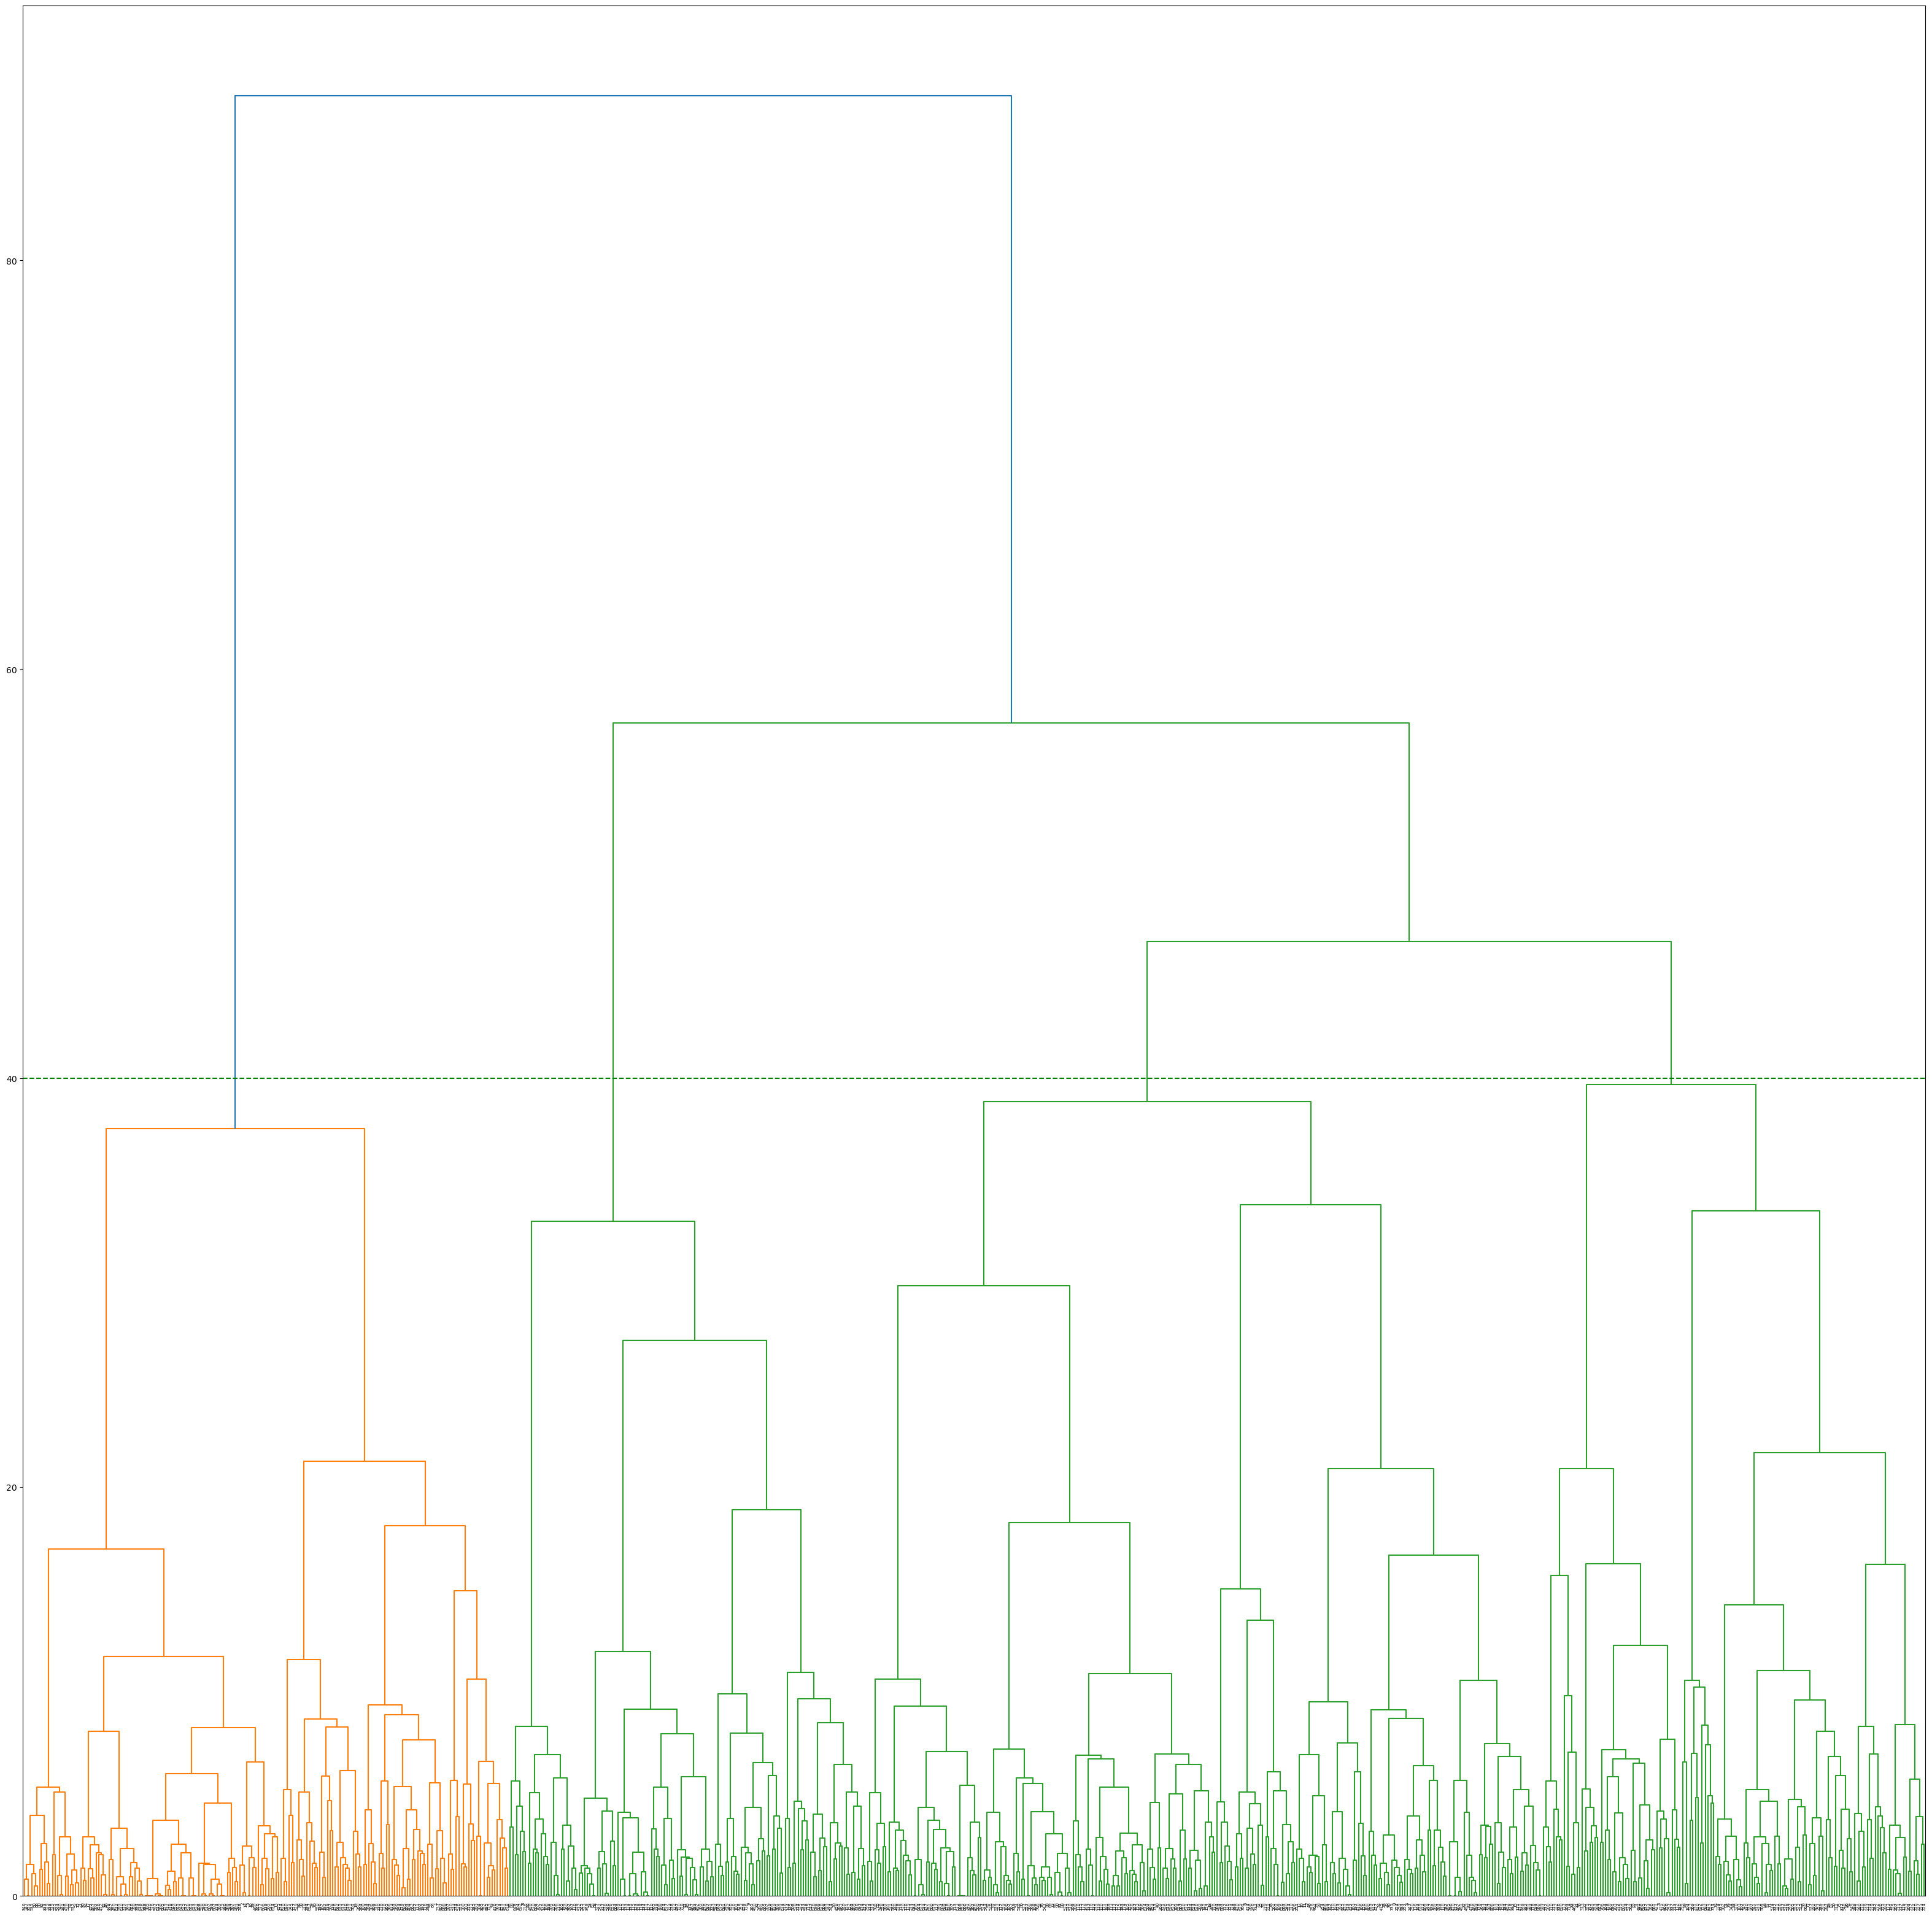

In [36]:
plt.figure(figsize=(40,40))
den=sch.dendrogram(sch.linkage(emp_df_copy,method='ward'))
plt.axhline(y=40,c='g',linestyle='--')

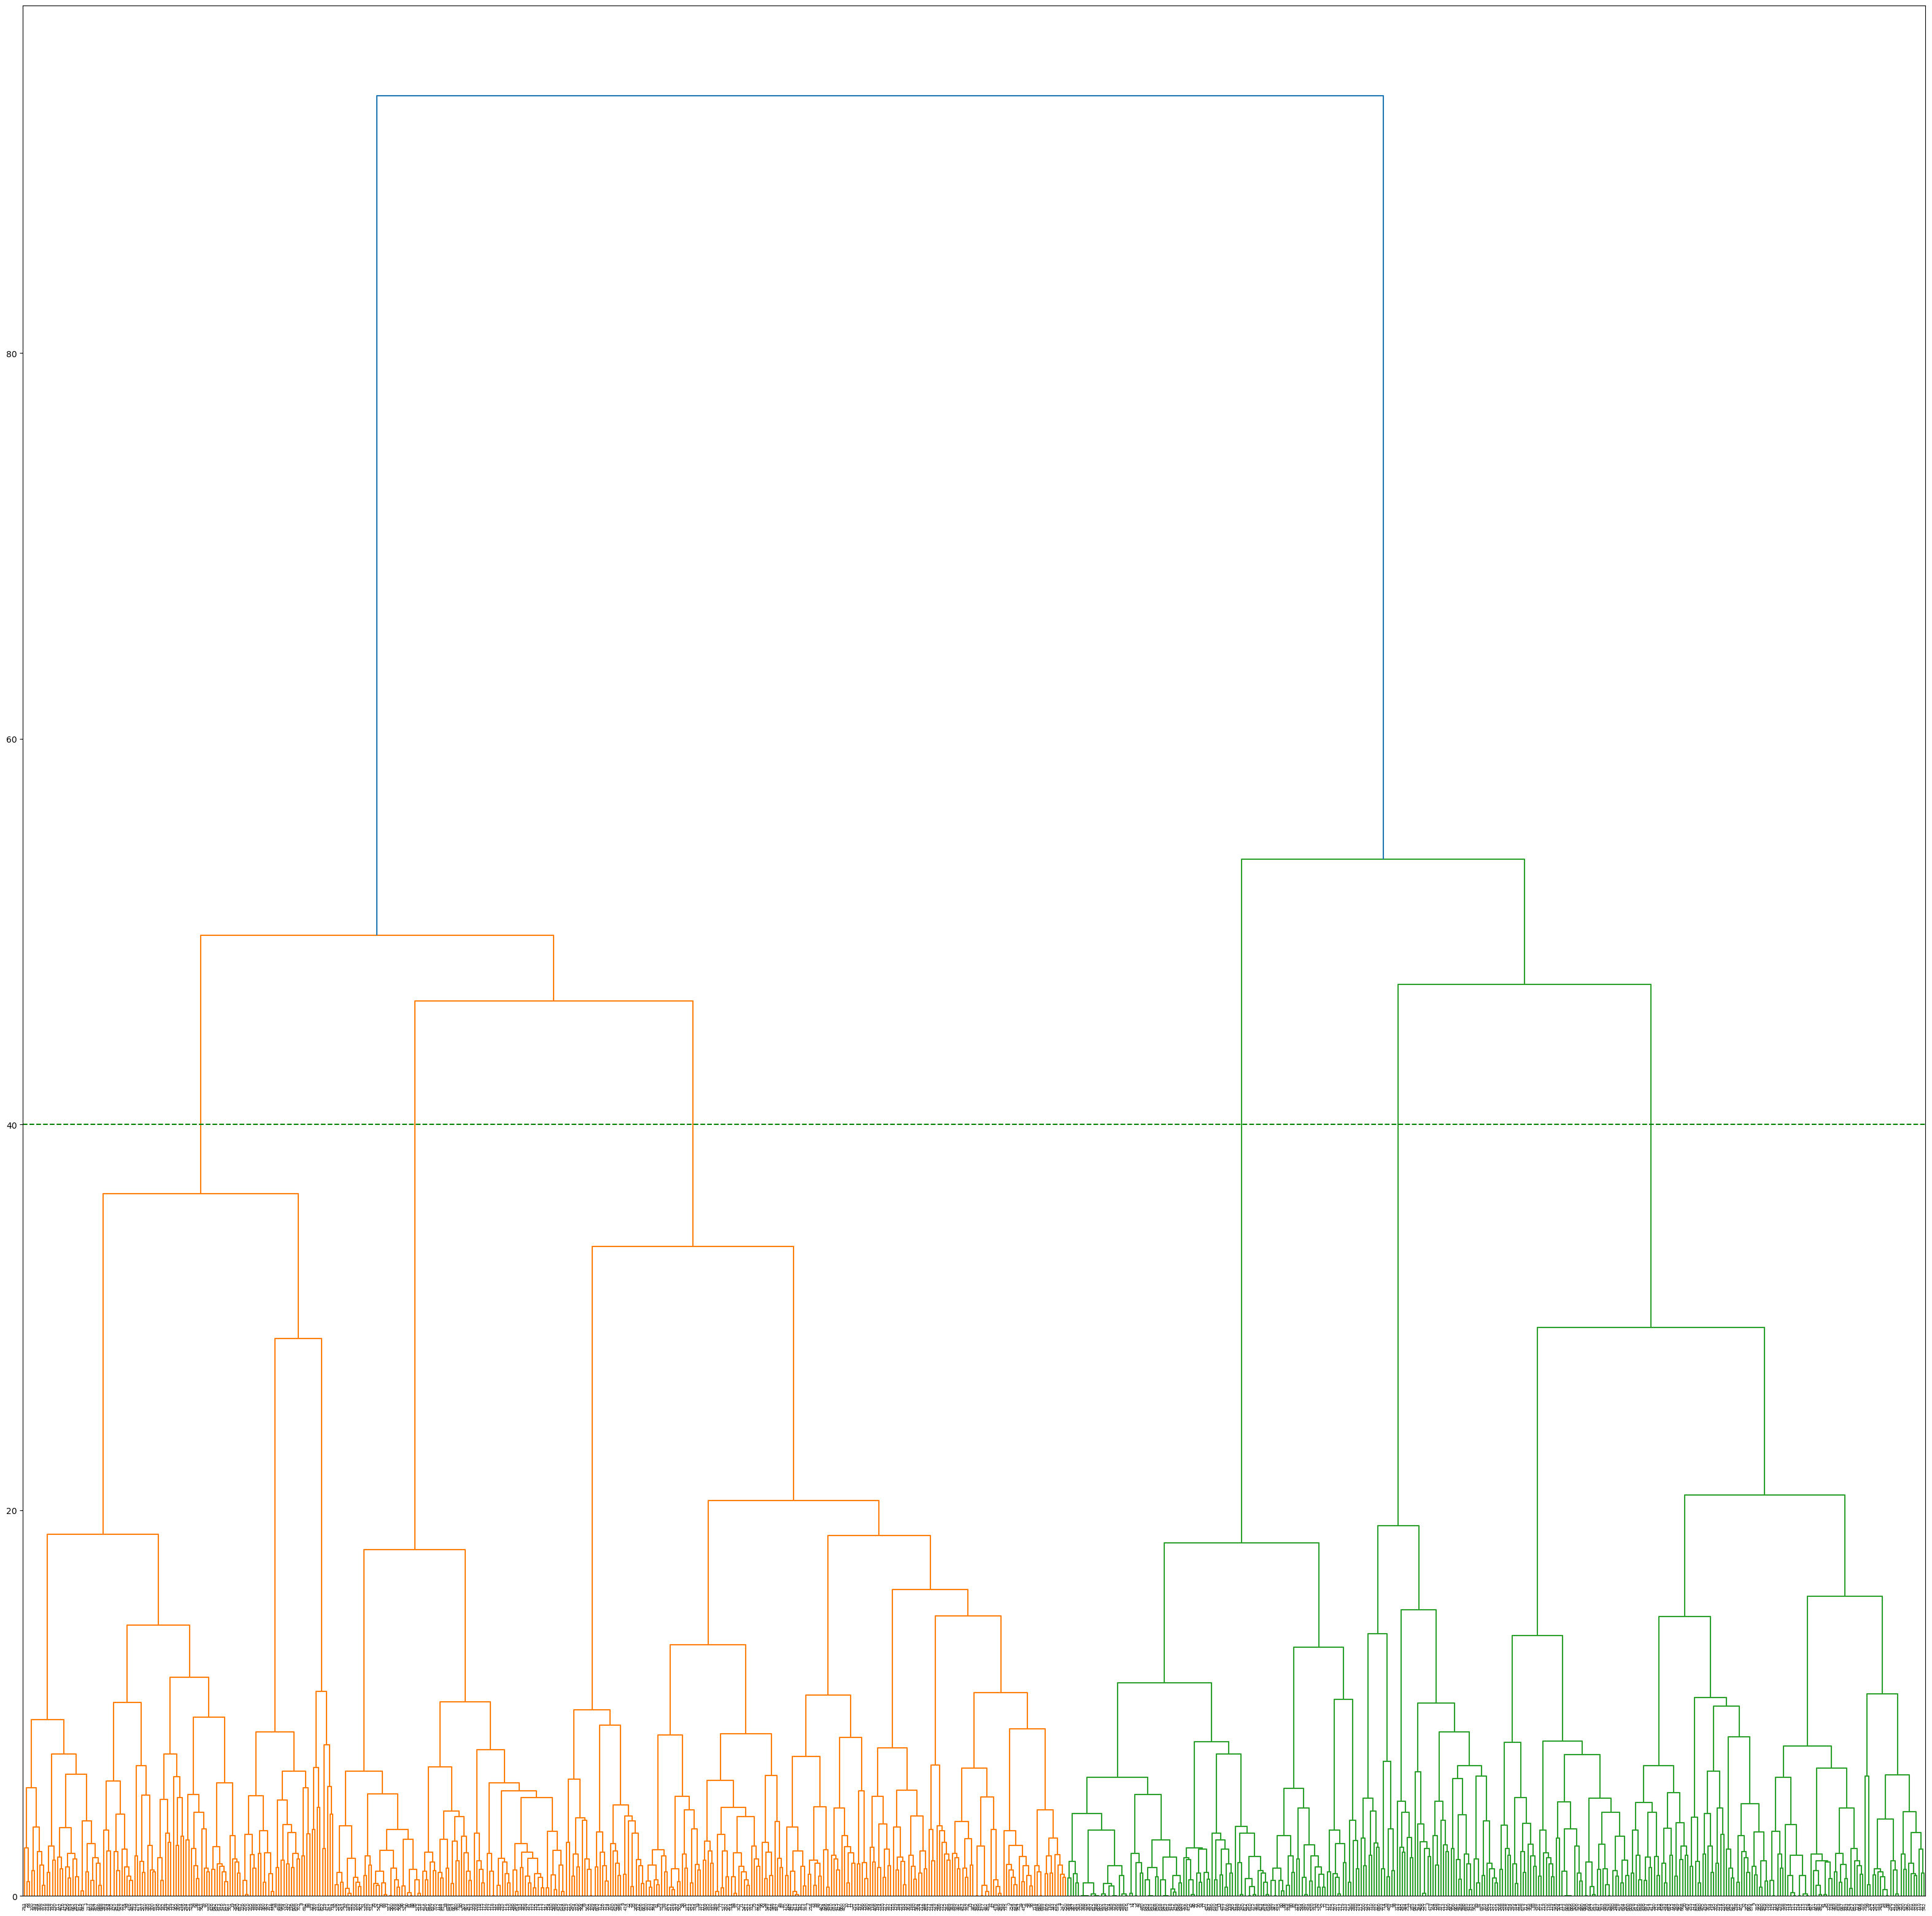

In [37]:
#reduced features
plt.figure(figsize=(40,40))
den=sch.dendrogram(sch.linkage(pca_x,method='ward'))
plt.axhline(y=40,c='g',linestyle='--')

In [38]:
Agglo_silhouette_score=[]
for i in range(2,11):
    ag_opt=AgglomerativeClustering(n_clusters=i)
    ag_opt.fit(emp_df_copy)
    Agglo_silhouette_score.append(silhouette_score(emp_df_copy,ag_opt.labels_))
print(Agglo_silhouette_score)

[0.22334642296366197, 0.17226672656570183, 0.17729987686557488, 0.1876155842896502, 0.18940638978598465, 0.1940588412040377, 0.20859186681267738, 0.2197648364508202, 0.2382331840210213]


In [39]:
Agglo_silhouette_score_red=[]
for i in range(2,11):
    ag_opt=AgglomerativeClustering(n_clusters=i)
    ag_opt.fit(pca_x)
    Agglo_silhouette_score_red.append(silhouette_score(pca_x,ag_opt.labels_))
print(Agglo_silhouette_score_red)

[0.24313949451187936, 0.23528750134969695, 0.23414951139511272, 0.26639522278932487, 0.28714831454442163, 0.30794420784588766, 0.32427981471460676, 0.31803314859226056, 0.32508207464345784]


# Interpretation
From the Dendrogram and silhouette_score, we conclude to having 10 clusters for Agglomerative clustering 

In [40]:
best(AgglomerativeClustering,4,emp_df_copy)

Reason for absence  Month of absence  Day of the week   Seasons  \
0            0.804938          0.196763        -0.643947 -1.390175   
1           -2.280124          0.196763        -0.643947 -1.390175   

   Transportation expense  Distance from Residence to Work  Service time  \
0                1.011408                         0.429556      0.101770   
1               -1.544379                        -1.121694      1.242825   

        Age  Work load Average/day  Hit target  ...       Son  Social drinker  \
0 -0.532868              -0.818212    0.638686  ...  0.893723        0.872872   
1  2.092860              -0.818212    0.638686  ... -0.017234        0.872872   

   Social smoker      Pet    Weight    Height  Body mass index  \
0      -0.280566  0.19285  0.851673 -0.019046         0.775932   
1      -0.280566 -0.56624  1.473056  0.975828         1.009438   

   Absenteeism time in hours  KMeans(n_clusters=9)  \
0                  -0.219511                     2   
1                  -0.519767                     8   

   AgglomerativeClustering(n_clusters=4)  
0                                      1  
1                                      3  

[2 rows x 21 columns]

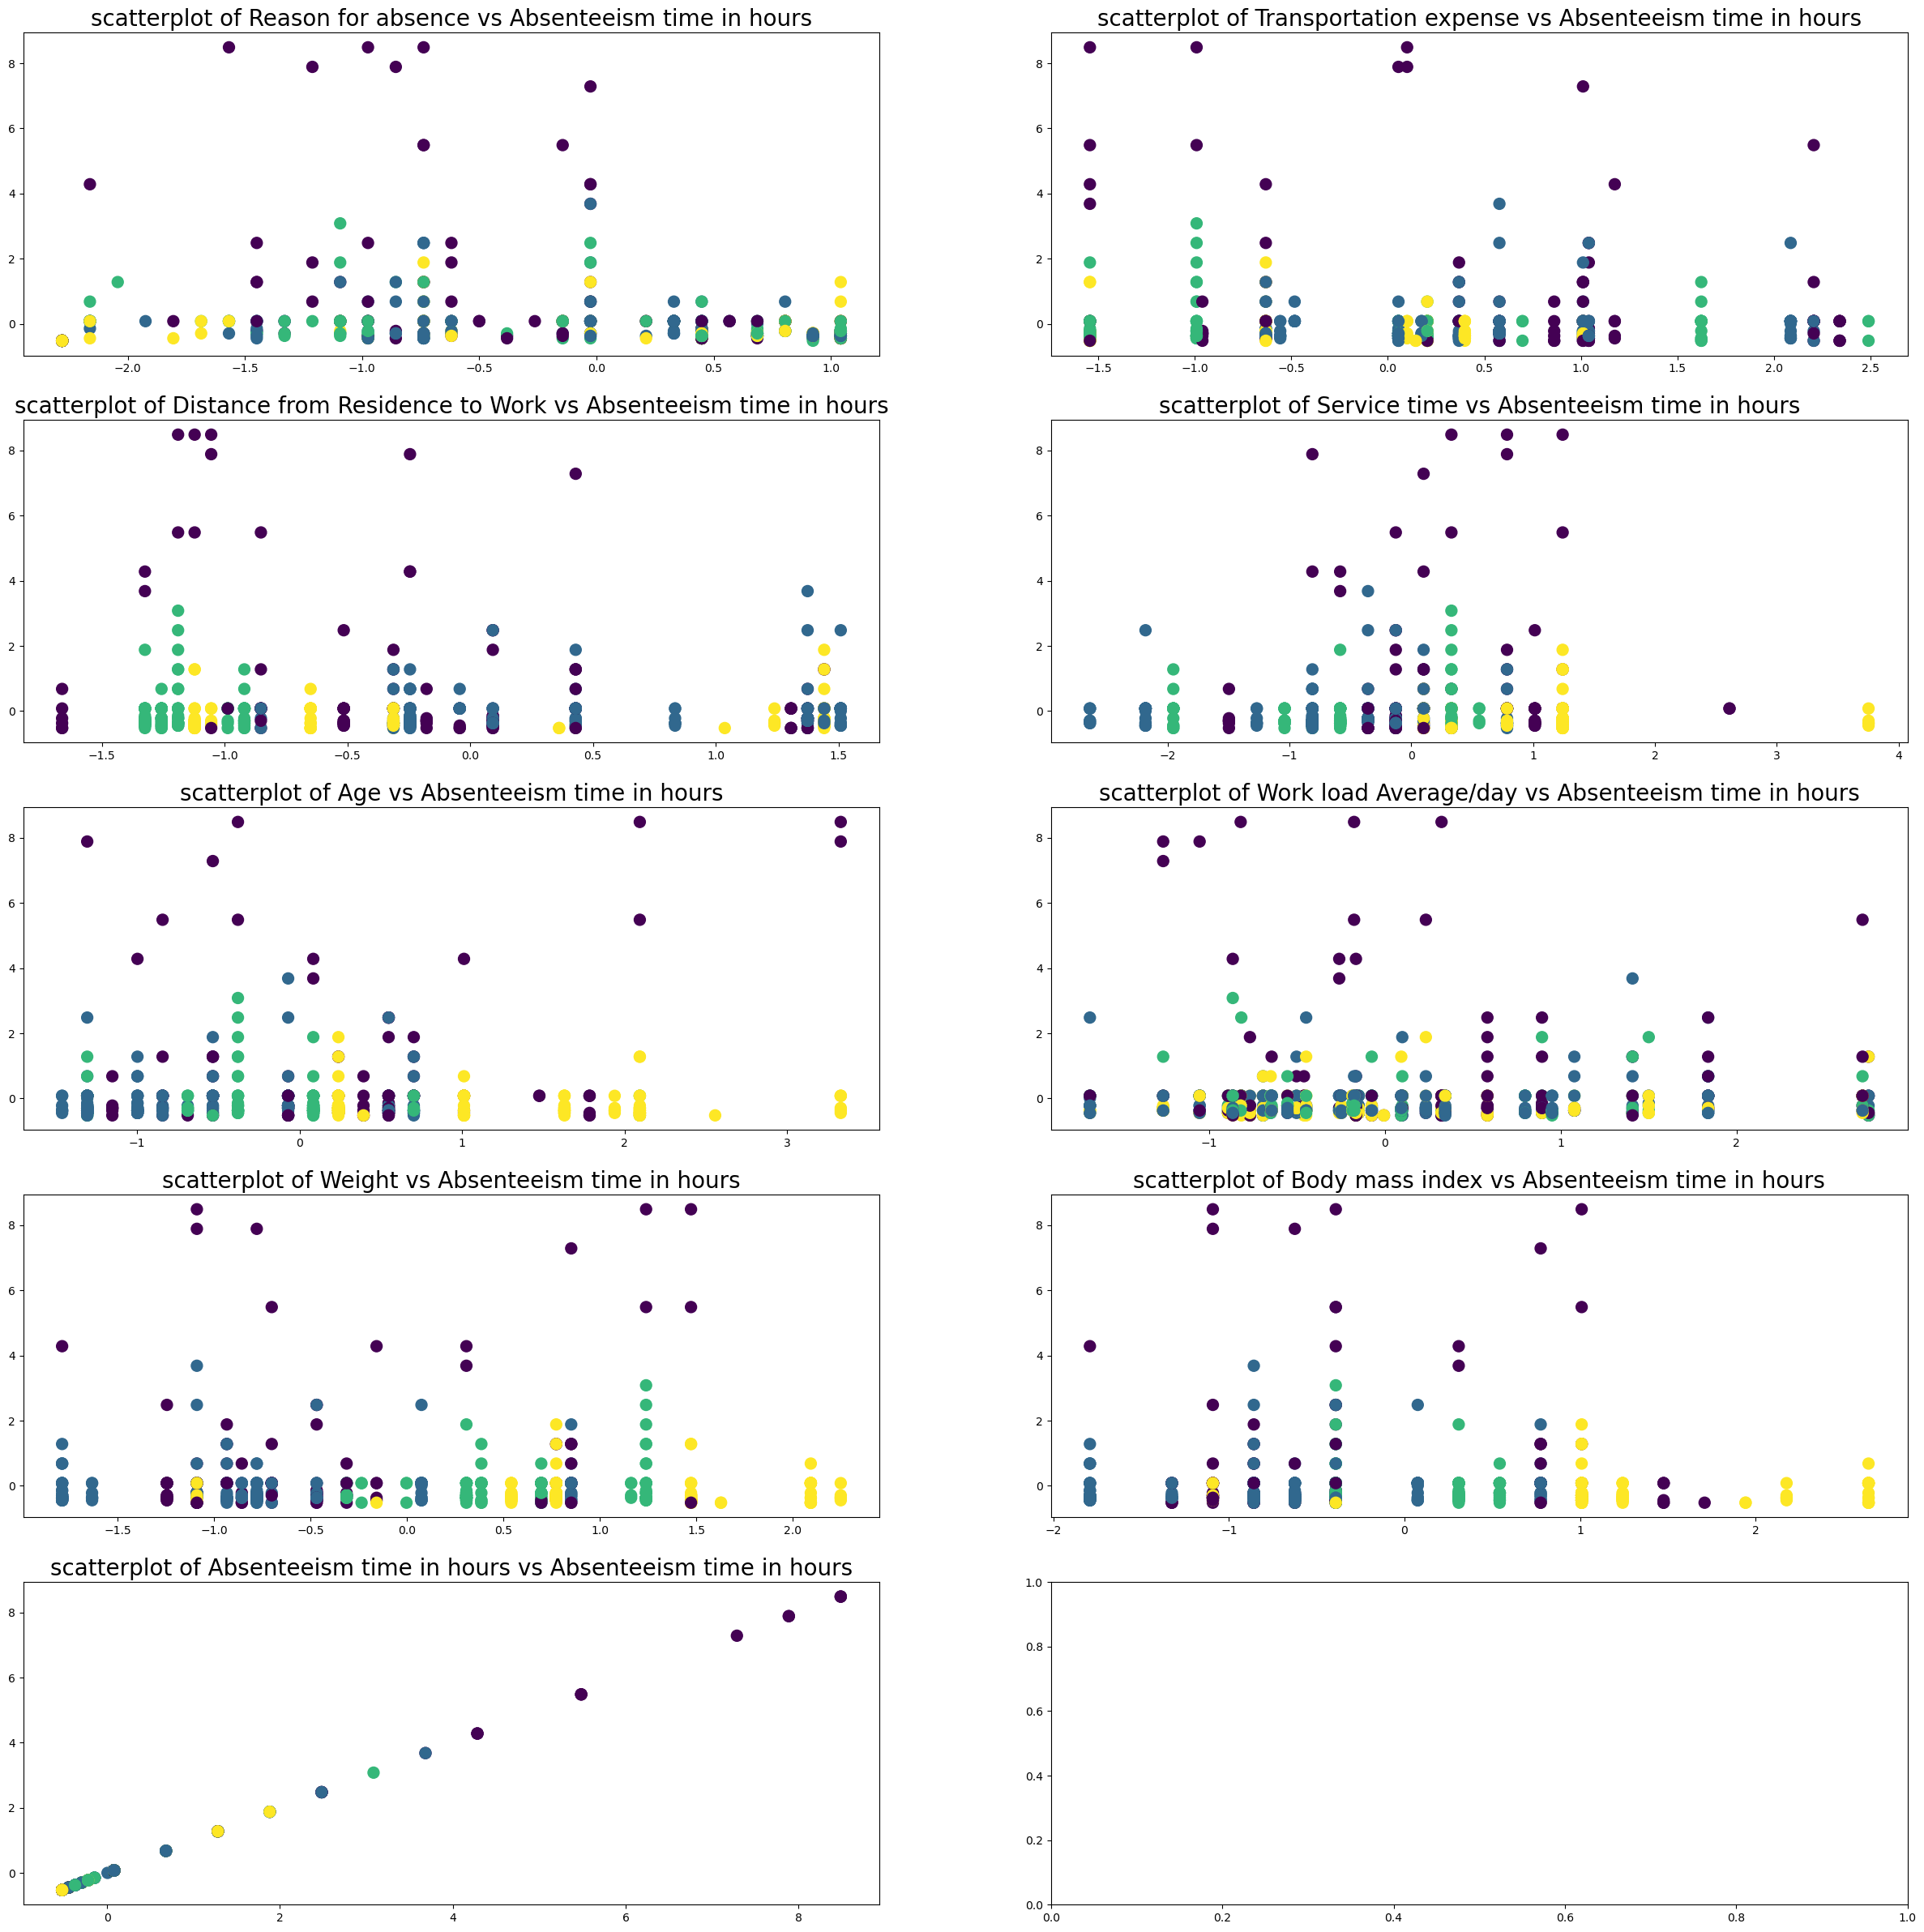

In [95]:
fig,ax=plt.subplots(5,2,figsize=(30,30))

for i,j in list(zip(emp_df_copy[numerical].columns,ax.flatten())):
    j.scatter(emp_df_copy[i],emp_df_copy['Absenteeism time in hours'],c=emp_df_copy['AgglomerativeClustering(n_clusters=4)'],s=100)
    j.set_title(f'scatterplot of {i} vs Absenteeism time in hours',fontsize=20)


In [43]:
best(AgglomerativeClustering,4,pca_x)

0         1         2         3         4         5         6  \
0  0.816755  1.258357 -1.181488  0.473727 -1.219634  0.327099  1.115557   
1  3.196792 -1.684506  0.814939  1.042924 -0.219892  1.083513  0.757025   

          7         8         9        10        11  KMeans(n_clusters=9)  \
0 -0.385687 -0.388726 -0.280745 -0.429692 -0.690925                     5   
1 -0.444156 -0.423556  1.097940  0.446461 -1.105517                     7   

   AgglomerativeClustering(n_clusters=4)  
0                                      1  
1                                      3

<Figure size 4000x4000 with 0 Axes>

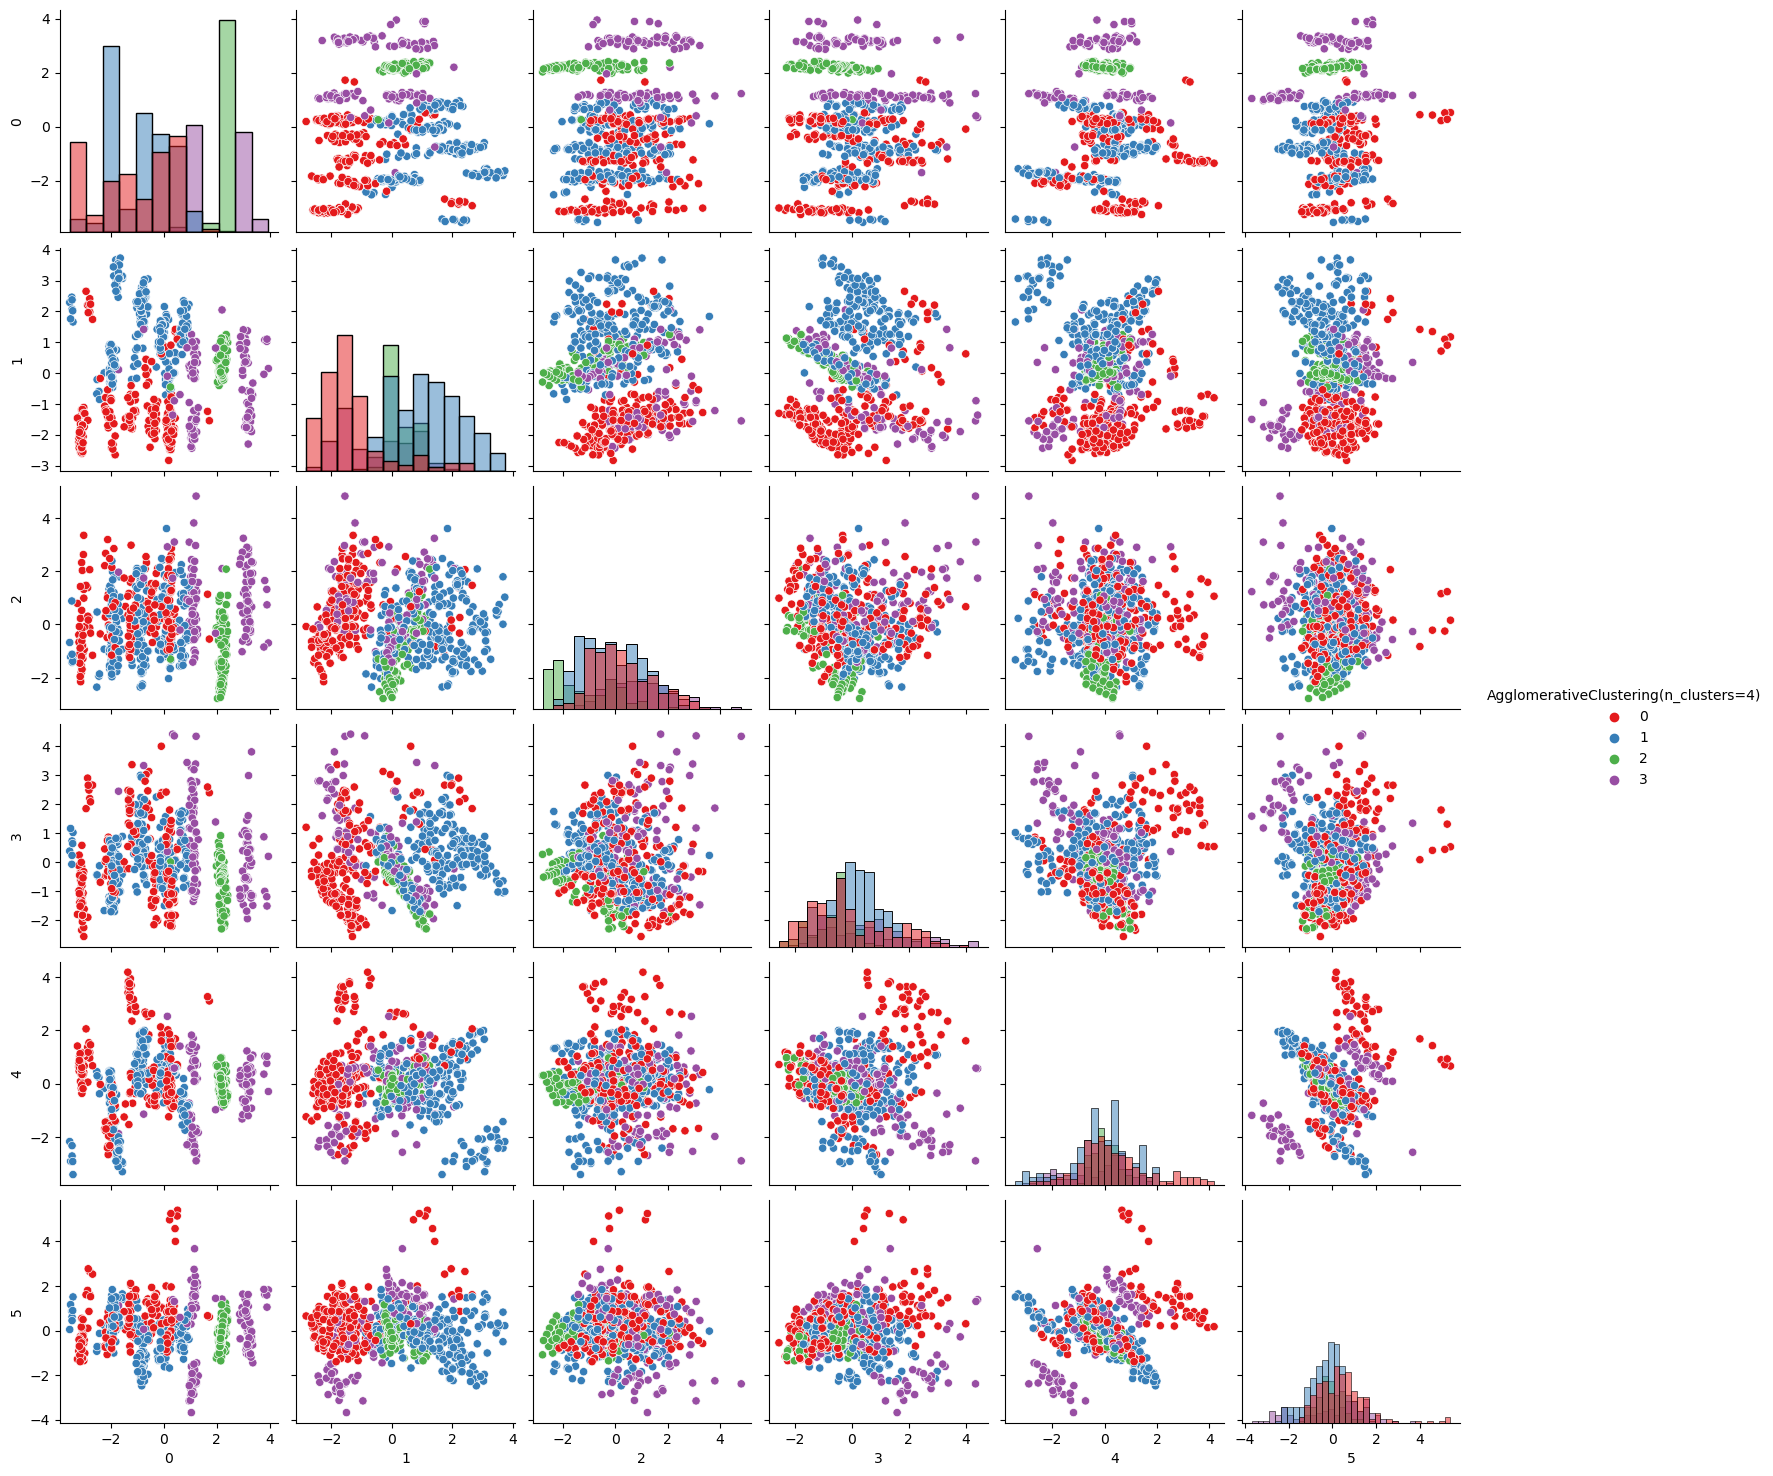

In [44]:
plt.figure(figsize=(40,40))
sns.pairplot(pca_x.iloc[:,[0,1,2,3,4,5,13]],hue='AgglomerativeClustering(n_clusters=4)',diag_kind='hist',palette='Set1')

# DBSCAN Clustering

In [46]:
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=2)
nn.fit(emp_df_copy)
distances,indices=nn.kneighbors(emp_df_copy)

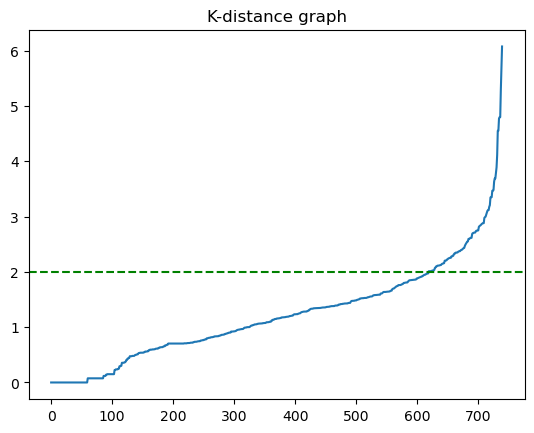

In [47]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.title('K-distance graph')
plt.axhline(y=2,c='g',linestyle='--')

In [48]:
nn=NearestNeighbors(n_neighbors=2)
nn.fit(pca_x)
distances,indices=nn.kneighbors(pca_x)

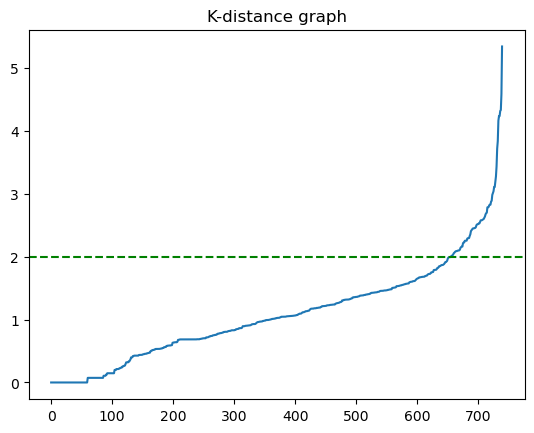

In [49]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.title('K-distance graph')
plt.axhline(y=2,c='g',linestyle='--')

In [50]:
eps=2

In [51]:
db_silhouette_score=[]
for i in range(2,11):
    db_scan_opt=DBSCAN(eps=eps,min_samples=i)
    db_scan_opt.fit(emp_df_copy)
    db_silhouette_score.append(silhouette_score(emp_df_copy,db_scan_opt.labels_))
print(db_silhouette_score)

[0.18544385833405283, 0.1575065327925865, 0.10198489921771442, 0.07091957755564686, 0.043779496745915795, 0.022921447416037306, -0.005206004645257469, -0.01976180127213238, -0.038192098894966824]


In [52]:
db_silhouette_score_red=[]
for i in range(2,11):
    db_scan_opt=DBSCAN(eps=eps,min_samples=i)
    db_scan_opt.fit(pca_x)
    db_silhouette_score_red.append(silhouette_score(pca_x,db_scan_opt.labels_))
print(db_silhouette_score_red)

[0.16497109442094554, 0.15727685198203334, 0.12652135302045914, 0.15188130953470322, 0.11998740451872102, 0.09474181492286743, 0.10639491271468118, 0.08119738387423399, 0.08024554654470305]


# Interpretation
From K distance graph and silhouette_score ,we conclude to having min_samples as 2 and epsilon radius as 2 

In [53]:
db_best=DBSCAN(eps=2,min_samples=3)
db_best.fit(emp_df_copy)
emp_df_copy['DBSCAN_Cluatering']=db_best.labels_
emp_df_copy.head(2)

Reason for absence  Month of absence  Day of the week   Seasons  \
0            0.804938          0.196763        -0.643947 -1.390175   
1           -2.280124          0.196763        -0.643947 -1.390175   

   Transportation expense  Distance from Residence to Work  Service time  \
0                1.011408                         0.429556      0.101770   
1               -1.544379                        -1.121694      1.242825   

        Age  Work load Average/day  Hit target  ...  Social drinker  \
0 -0.532868              -0.818212    0.638686  ...        0.872872   
1  2.092860              -0.818212    0.638686  ...        0.872872   

   Social smoker      Pet    Weight    Height  Body mass index  \
0      -0.280566  0.19285  0.851673 -0.019046         0.775932   
1      -0.280566 -0.56624  1.473056  0.975828         1.009438   

   Absenteeism time in hours  KMeans(n_clusters=9)  \
0                  -0.219511                     2   
1                  -0.519767                     8   

   AgglomerativeClustering(n_clusters=4)  DBSCAN_Cluatering  
0                                      1                  0  
1                                      3                  1  

[2 rows x 22 columns]

In [54]:
emp_df_copy['DBSCAN_Cluatering'].value_counts()

-1     167
 2      97
 11     81
 7      52
 15     39
 0      25
 6      25
 4      20
 1      19
 10     18
 20     15
 24     13
 13     11
 5      10
 3       9
 25      8
 17      8
 39      7
 8       7
 43      6
 19      6
 12      6
 16      6
 34      5
 36      5
 44      5
 9       5
 45      4
 30      4
 37      4
 32      4
 21      4
 31      3
 41      3
 40      3
 38      3
 35      3
 18      3
 28      3
 29      3
 27      3
 14      3
 26      3
 42      3
 23      3
 22      3
 33      3
Name: DBSCAN_Cluatering, dtype: int64

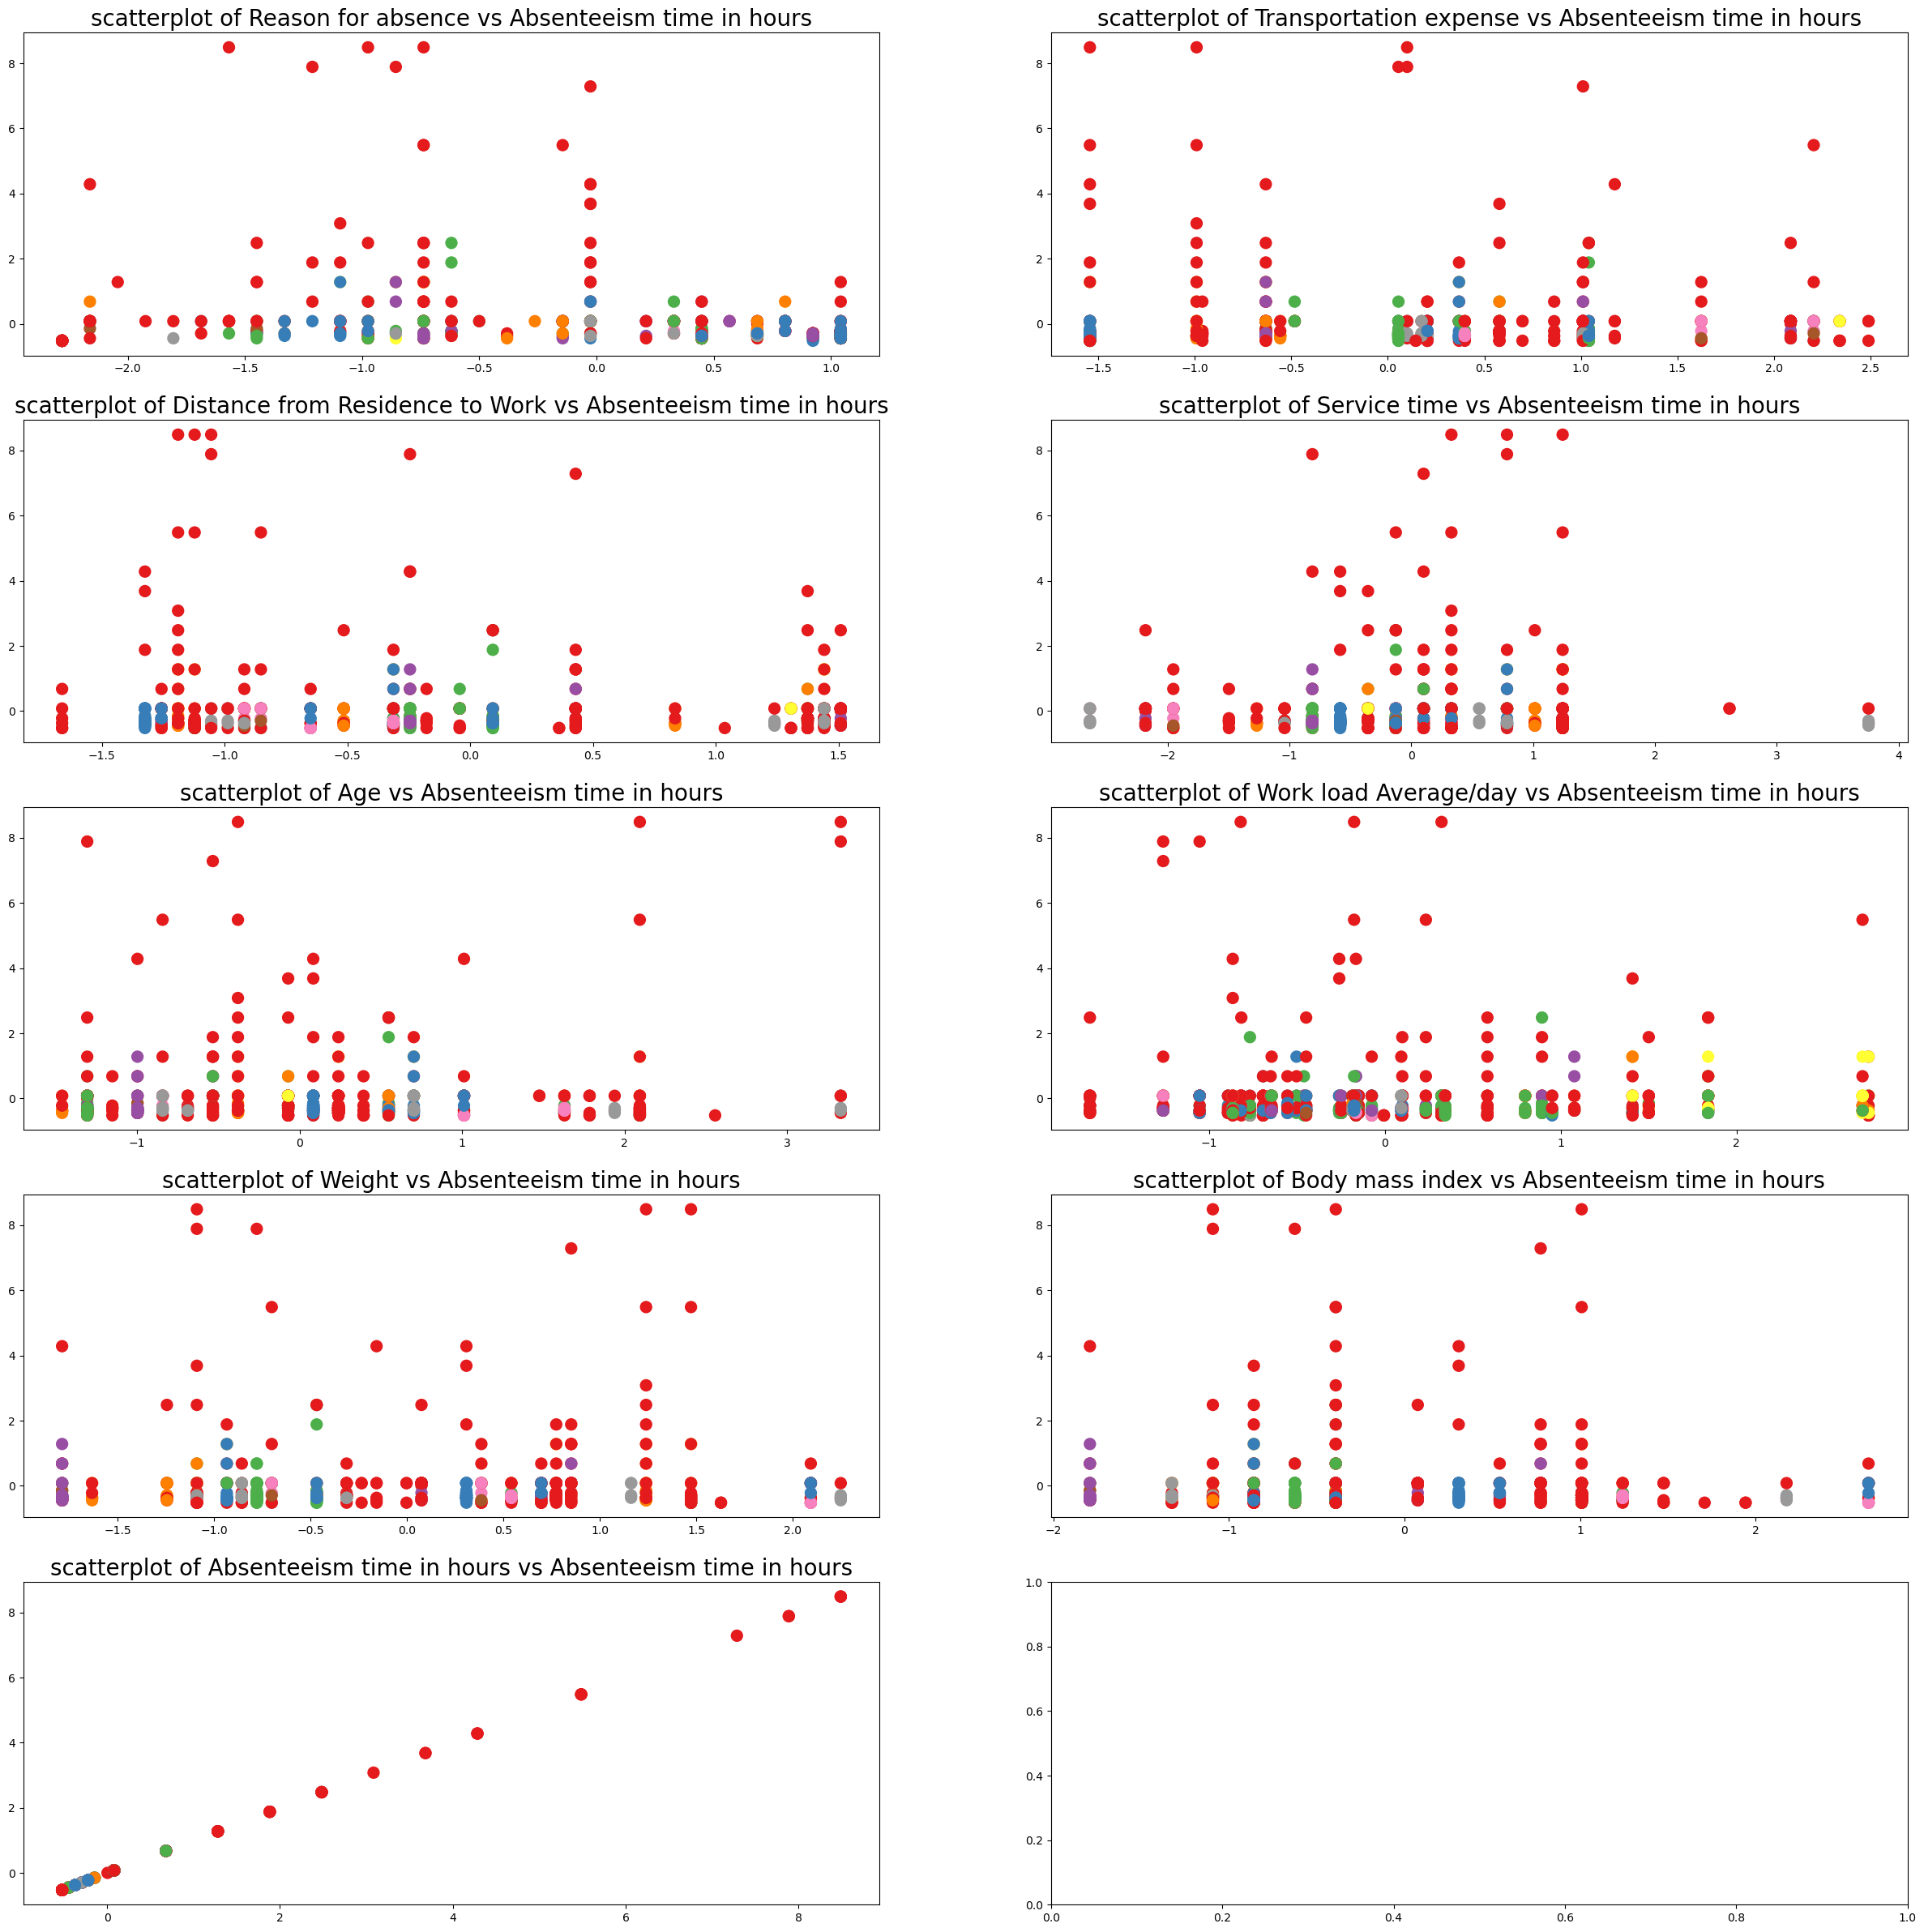

In [94]:
fig,ax=plt.subplots(5,2,figsize=(30,30))

for i,j in list(zip(emp_df_copy[numerical].columns,ax.flatten())):
    j.scatter(emp_df_copy[i],emp_df_copy['Absenteeism time in hours'],c=emp_df_copy['DBSCAN_Cluatering'],s=100,cmap='Set1',marker='o')
    j.set_title(f'scatterplot of {i} vs Absenteeism time in hours',fontsize=20)

In [56]:
db_best=DBSCAN(eps=2,min_samples=3)
db_best.fit(pca_x)
pca_x['DBSCAN_Cluatering']=db_best.labels_
pca_x.head(2)

0         1         2         3         4         5         6  \
0  0.816755  1.258357 -1.181488  0.473727 -1.219634  0.327099  1.115557   
1  3.196792 -1.684506  0.814939  1.042924 -0.219892  1.083513  0.757025   

          7         8         9        10        11  KMeans(n_clusters=9)  \
0 -0.385687 -0.388726 -0.280745 -0.429692 -0.690925                     5   
1 -0.444156 -0.423556  1.097940  0.446461 -1.105517                     7   

   AgglomerativeClustering(n_clusters=4)  DBSCAN_Cluatering  
0                                      1                  0  
1                                      3                  1

In [57]:
pca_x.DBSCAN_Cluatering.value_counts()

-1     112
 2     108
 0      97
 11     84
 6      70
 5      43
 13     40
 10     23
 1      22
 8      21
 4      19
 7      18
 17     16
 9       8
 21      6
 27      6
 15      4
 20      4
 22      4
 24      4
 28      4
 12      3
 16      3
 3       3
 18      3
 19      3
 23      3
 25      3
 26      3
 14      3
Name: DBSCAN_Cluatering, dtype: int64

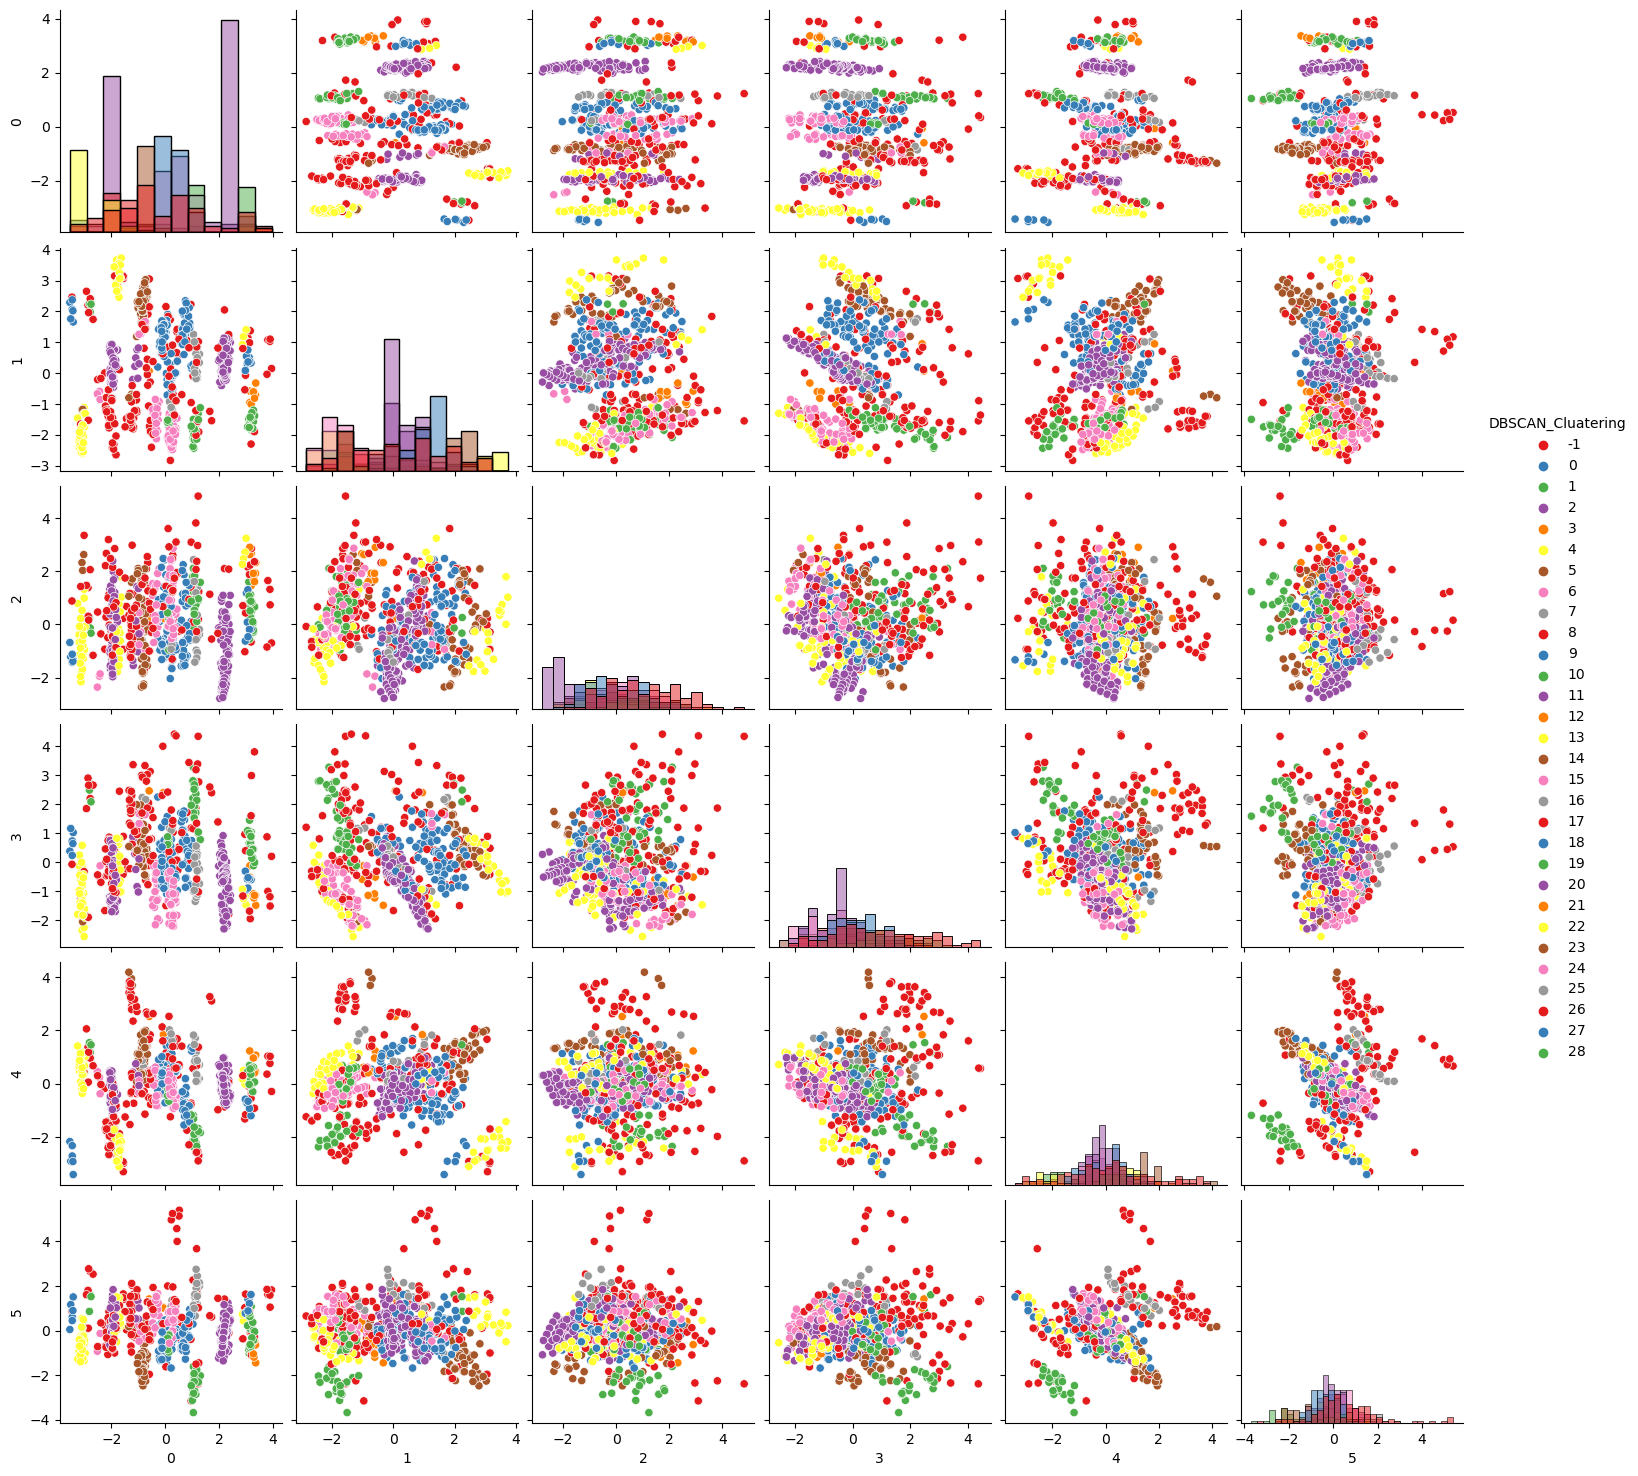

In [58]:
sns.pairplot(pca_x.iloc[:,[0,1,2,3,4,5,14]],hue='DBSCAN_Cluatering',diag_kind='hist',palette='Set1')

In [78]:
cluster_info=pd.DataFrame(data=[K_means_silhouette,K_means_silhouette_red,Agglo_silhouette_score,Agglo_silhouette_score_red,db_silhouette_score,db_silhouette_score_red],
                  columns=['2_clusters','3_clusters','4_clusters','5_clusters','6_clusters','7_clusters','8_clusters','9_clusters','10_clusters'],
                 index=['K_means_silhouette','K_means_silhouette_red','Agglo_silhouette_score','Agglo_silhouette_score_red','db_silhouette_score','db_silhouette_score_red'])

In [79]:
cluster_info

2_clusters  3_clusters  4_clusters  5_clusters  \
K_means_silhouette            0.130929    0.143828    0.153159    0.152130   
K_means_silhouette_red        0.122204    0.150578    0.184906    0.170804   
Agglo_silhouette_score        0.223346    0.172267    0.177300    0.187616   
Agglo_silhouette_score_red    0.243139    0.235288    0.234150    0.266395   
db_silhouette_score           0.185444    0.157507    0.101985    0.070920   
db_silhouette_score_red       0.164971    0.157277    0.126521    0.151881   

                            6_clusters  7_clusters  8_clusters  9_clusters  \
K_means_silhouette            0.170893    0.183928    0.192364    0.207700   
K_means_silhouette_red        0.180057    0.180682    0.134105    0.217056   
Agglo_silhouette_score        0.189406    0.194059    0.208592    0.219765   
Agglo_silhouette_score_red    0.287148    0.307944    0.324280    0.318033   
db_silhouette_score           0.043779    0.022921   -0.005206   -0.019762   
db_silhouette_score_red       0.119987    0.094742    0.106395    0.081197   

                            10_clusters  
K_means_silhouette             0.180878  
K_means_silhouette_red         0.209863  
Agglo_silhouette_score         0.238233  
Agglo_silhouette_score_red     0.325082  
db_silhouette_score           -0.038192  
db_silhouette_score_red        0.080246

# Interpretation
- we can aasume any number of clusters and compare its silhouette score with PCA reduced features
- PCA feature extraction reduces the curse of dimensionality and improves the model performance 
- Quality of clusters formed in agglomerative clustering is good and can be considered the best model with diffreent number of   clusters
 

# Buisness conclusion